# Predicting Premier Position: Using Machine learning methods to predict football league rankings

This is the supporting notebook for the research report of the same name. It will be structure as such:

> 1. Data retrieval
> 2. Data wrangling
> 3. Feature Engineering
> 4. Imputing missing values (further Data Wrangling)
> 5. Exploratory Data analysis
> 6. Data modelling
> 7. Visualisations and reflection
> 8. League table prediction


The main analytical approach of this research will be to bring together different variables relating to a football team's performance, with the view of distilling them down to the most relevant and powerful predictors of the dependent variable, which in this case will be the number of points the team accrues in the following season. 

## <font color='blue'>1. Data Retrieval</font>

### 1.1 importing csv files

The following csv files were obtained from footystats.org, a sports betting site that collects detailed data from many football leagues around the world. These csv files contain data of each team's performance over a given season in a given league, such as number of wins, goals scored, and more.

In [1]:
import glob
import pandas as pd
import numpy as np

# read in csv files for each league and concatenate to create dataframes for each league containing all available
# sesasons



# English Premier League (EPL)

teams_files = glob.glob('/Users/Jake/Documents/uni/project:datasets/football stats/footystats/Premier League/england-premier-league-teams*.csv')


teamslist = []


for filename in teams_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    teamslist.append(df)

pl_df = pd.concat(teamslist, axis=0, ignore_index=True)


# Spain's La Liga

teams_files = glob.glob('/Users/Jake/Documents/uni/project:datasets/football stats/footystats/La Liga/spain-la-liga-teams*.csv')


teamslist = []


for filename in teams_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    teamslist.append(df)

spain_df = pd.concat(teamslist, axis=0, ignore_index=True)



# Italy's Serie A

teams_files = glob.glob('/Users/Jake/Documents/uni/project:datasets/football stats/footystats/Serie A/italy-serie-a-teams*.csv')


teamslist = []


for filename in teams_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    teamslist.append(df)

italy_df = pd.concat(teamslist, axis=0, ignore_index=True)



# France's Ligue 1

teams_files = glob.glob('/Users/Jake/Documents/uni/project:datasets/football stats/footystats/Ligue 1/france-ligue-1-teams*.csv')


teamslist = []


for filename in teams_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    teamslist.append(df)

france_df = pd.concat(teamslist, axis=0, ignore_index=True)


In [2]:
print(pl_df.shape)
print(spain_df.shape)
print(italy_df.shape)
print(france_df.shape)

(260, 280)
(240, 280)
(220, 280)
(220, 280)


The leagues used were chosen as they were 4 of the few leagues which all play with 20 teams, therefore have the same number of matches and a comparable number of points accrued across a season, which will be important for the present research questions. The type of data contained in the data frames are consistent for each league, however there are some missing seasons - hence the lack of uniformity in the number of rows - which may need to be addressed when feature engineering based on ranking or team performance from the previous season. A sample of the English Premier League data frame can be seen below:

In [4]:
pd.options.display.max_columns = 280
pl_df.sample(20)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,points_per_game_home,points_per_game_away,league_position,league_position_home,league_position_away,performance_rank,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,goal_difference_home,goal_difference_away,minutes_per_goal_scored,minutes_per_goal_scored_home,minutes_per_goal_scored_away,minutes_per_goal_conceded,minutes_per_goal_conceded_home,minutes_per_goal_conceded_away,clean_sheets,clean_sheets_home,clean_sheets_away,btts_count,btts_count_home,btts_count_away,fts_count,fts_count_home,fts_count_away,first_team_to_score_count,first_team_to_score_count_home,first_team_to_score_count_away,corners_total,corners_total_home,corners_total_away,cards_total,cards_total_home,cards_total_away,average_possession,average_possession_home,average_possession_away,shots,shots_home,shots_away,shots_on_target,shots_on_target_home,shots_on_target_away,shots_off_target,shots_off_target_home,shots_off_target_away,fouls,fouls_home,fouls_away,goals_scored_half_time,goals_scored_half_time_home,goals_scored_half_time_away,goals_conceded_half_time,goals_conceded_half_time_home,goals_conceded_half_time_away,goal_difference_half_time,goal_difference_half_time_home,goal_difference_half_time_away,leading_at_half_time,leading_at_half_time_home,leading_at_half_time_away,draw_at_half_time,draw_at_half_time_home,draw_at_half_time_away,losing_at_half_time,losing_at_half_time_home,losing_at_half_time_away,points_per_game_half_time,points_per_game_half_time_home,points_per_game_half_time_away,average_total_goals_per_match,average_total_goals_per_match_home,average_total_goals_per_match_away,goals_scored_per_match,goals_scored_per_match_home,goals_scored_per_match_away,goals_conceded_per_match,goals_conceded_per_match_home,goals_conceded_per_match_away,total_goals_per_match_half_time,total_goals_per_match_half_time_home,total_goals_per_match_half_time_away,goals_scored_per_match_half_time,goals_scored_per_match_half_time_home,goals_scored_per_match_half_time_away,goals_conceded_per_match_half_time,goals_conceded_per_match_half_time_home,goals_conceded_per_match_half_time_away,over05_count,over15_count,over25_count,over35_count,over45_count,over55_count,over05_count_home,over15_count_home,over25_count_home,over35_count_home,over45_count_home,over55_count_home,over05_count_away,over15_count_away,over25_count_away,over35_count_away,over45_count_away,over55_count_away,under05_count,under15_count,under25_count,under35_count,under45_count,under55_count,under05_count_home,under15_count_home,under25_count_home,under35_count_home,under45_count_home,under55_count_home,under05_count_away,under15_count_away,under25_count_away,under35_count_away,under45_count_away,under55_count_away,over05_percentage,over15_percentage,over25_percentage,over35_percentage,over45_percentage,over55_percentage,over05_percentage_home,over15_percentage_home,over25_percentage_home,over35_percentage_home,over45_percentage_home,over55_percentage_home,over05_percentage_away,over15_percentage_away,over25_percentage_away,over35_percentage_away,over45_percentage_away,over55_percentage_away,under05_percentage,under15_percentage,under25_percentage,under35_percentage,under45_percentage,under55_percentage,under05_percentage_home,under15_percentage_home,under25_percentage_home,under35_percentage_home,under45_percentage_home,under55_percentage_home,under05_percentage_away,under15_percentage_away,under25_percentage_away,under35_percentage_away,under45_percentage_away,under55_percentage_away,over05_count_half_time,over15_count_half_time,over25_count_half_time,over05_count_half_time_home,over15_count_half_time_home,over25_count_half_time_home,over05_count_half_time_away,over1

### 1.2 Scraping of finance data

To go alongside the in-game statistics of the teams collected, another big factor in team success is the amount of financial input the club receives to bring in players that will assist their performance. A team can perform poorly one season, and then can demonstrate a drastic performance improvement due a revivial of personnel from financial backing of the owners. Conversely, a team that does not receive much financial support would be expected to gradually decline in performance as other teams continue to develop, especially at the extremely high and competitive levels that these leagues are. These are the biggest, and therefore most televised football leagues in the world, and thus money circulating through these leagues play a very important role.

The following financial data is scraped from transfermrkt.com, the general terms of use of which can be found here:
> https://www.transfermarkt.co.uk/intern/anb

It has been reviewed by the present author and is deemed available to use after checking with the comapany admin via email.

In [62]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np

# inspiration and aiding of the following code can be found from these sites: 
# https://fcpython.com/blog/introduction-scraping-data-transfermarkt
# https://ggrahambaker.github.io/blog/2019/06/11/webscraping-transfermarkt
# https://dev.to/lisandramelo/extracting-data-from-transfermarkt-an-introduction-to-webscraping-2i1c

# the user agent for chrome browser on macOS
header = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

# lists of countries and dates to iterate through in the urls
leagues = ['GB', 'FR', 'ES', 'IT']
league_dict = {'GB':'EPL', 'FR':'Ligue 1', 'ES': 'La Liga', 'IT': 'Serie A'}

years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

#iterating through each url and scraping the tabular club transfer data from the page
df_list = []
for each in range(len(leagues)):
    for i in range(len(years)):
        page = 'https://www.transfermarkt.co.uk/premier-league/einnahmenausgaben/wettbewerb/{country}1/ids/a/sa//saison_id/{year}/saison_id_bis/{year}/nat/0/pos//w_s//intern/1'.format(country = leagues[each], year = years[i])
        tree = requests.get(page, headers = header)
        soup = bs(tree.content, 'html.parser')
        table = soup.find('div', {'class': 'responsive-table'})
        df = pd.read_html(str(table))[0]
        df['season'] = str(years[i])+'-'+str(int(years[i])+1)
        df['league'] = league_dict[leagues[each]]
        df_list.append(df)
fdf = pd.concat(df_list, axis=0, ignore_index=True) # fdf (financial df)

## <font color='blue'>2. Data Wrangling</font>

### 2.1 Prepping Financial Data for merging with main data

In [63]:
fdf.head()

,#,club,club.1,club.2,Expenditure,Arrivals,Income,Departures,Balance,season,league
0,1,NaN,Liverpool FC,£101.88m,30,£40.73m,27,£-61.15m,NaN,2007-2008,EPL
1,2,NaN,Manchester United,£93.15m,23,£41.94m,23,£-51.21m,NaN,2007-2008,EPL
2,3,NaN,Tottenham Hotspur,£84.74m,26,£20.30m,23,£-64.44m,NaN,2007-2008,EPL
3,4,NaN,Manchester City,£70.16m,28,£9.51m,26,£-60.65m,NaN,2007-2008,EPL
4,5,NaN,Sunderland AFC,£57.89m,30,£2.88m,21,£-55.01m,NaN,2007-2008,EPL


#### 2.2 realigning columns with values

For some reason, the returned dataframe seems to have some columns' data under the wrong column header due to a strange column 'club.2' appearing, shifting all values across one column. This is dealt with below.

In [64]:
fdf.drop(['#', 'club', 'Balance'], axis = 1, inplace = True)
column_names = {'club.1': 'club', 'club.2': 'expenditure', 'Expenditure':'arrivals', 'Arrivals': 'income', 'Income': 'departures', 'Departures':'balance'}
fdf.rename(columns = column_names, inplace = True)

#### 2.3 Removing letters denoting milllions and thousands, scaling, and converting to integers

In [66]:
# Removing pound symbol 
balance = fdf['balance'].apply(lambda x: x.replace('£', ''))

# Removing the 'm' in balance which represents millions
balance2 = balance.apply(lambda x: x.split('-')[1] if '+-0' in x else x)
    
# finally, removing the 'Th.' for thousands and diving that by 1000 so it is all to scale    
balance3 = balance2.apply(lambda x: int(x.split('T')[0])/1000 if 'Th.' in x else x.replace('m', ''))

# making a copy for sake of having a spare incase things go wrong, as scraping is quite time consuming
# also renames to 'fdf' for convenience
fdf2 = fdf.copy() 

#converting balance to numeric values
fdf['balance'] = balance3.apply(str)
fdf['balance'] = fdf.balance.apply(float)

#only keeping the merging columns and the balance column, as all others are highly correlated
# balance, and balance does the best job of relecting overall investment/improvement of a team

fdf.drop(['expenditure', 'arrivals', 'departures', 'income'], axis = 1, inplace = True)

#### 2.4 String matching the team names from the financial data frame and the main dataframe

Fuzzywuzz was attempted for this part of wrangling, however team names did not differ on a typo here or there, they often included completely different words as teams are often referred to as different things in different countries, and so the more painstaking method of using value_counts function to identify mismatched names and lambda functions. They are all included below, but of course were ran iteratively rather than all at once as the block below would indicate.

In [67]:
# creating the main df, containing all data from each of the individual league dfs
all_df = pd.concat([pl_df, spain_df, france_df, italy_df], axis = 0, ignore_index = True)

# electing to use the 'common_name' column from the main df as the team name column and dropping the other.
all_df = all_df.drop(['team_name'], axis = 1)
all_df.rename(columns = {'common_name':'team'}, inplace = True)

# creating a list of all the club names in the main df
all_df_names = list(all_df['team'])

In [95]:
# finding club names that occur in the financial df that do not occur in the main df

mismatching_names = fdf[~fdf['club'].isin(all_df_names)]
mismatching_names = mismatching_names['club']

print(mismatching_names.value_counts())
print(sum(mismatching_names.value_counts()))

Series([], Name: club, dtype: int64)
0


In [ ]:
# dropping all of the names that will not be necessary for the inner join, as they are only present in the seasons
# that are missing in the main df

toDrop = []
for idx, row in fdf.iterrows():
    if (row['league'] != 'EPL') & (row['season'] == '2007-2008'):
        toDrop.append(idx)
    elif (row['league'] == 'Ligue 1') & (row['season'] == '2008-2009'): 
        toDrop.append(idx)
    elif (row['league'] == 'Serie A') & (row['season'] == '2010-2011'):
        toDrop.append(idx)
        
fdf.drop(toDrop, axis =0, inplace=True)

In [78]:
fdf['club'] = fdf['club'].apply(lambda x: x.replace('FC', '').replace('AFC', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' A', '') if 'Sunderland A' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('ACF', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' C', '') if 'Genoa C' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('SS ', '') if 'SS Lazio' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('LOSC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('AS ', '') if 'AS Roma' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('Girondins ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('OGC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('AS ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('RCD ', '').replace(' Barcelona', '').strip() if 'Espanyol' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('SSC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' CF', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' Calcio', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('UC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' BC', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' 1909', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' HSC', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' Balompié', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' Verona', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('US ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('SM ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' de ', '').strip() if 'Deportivo' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('Calcio ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('-Montbéliard', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('-Lorraine', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('EA ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('AJ ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('UD ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('SC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' O', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('RC ', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('Stade ', '').strip())

In [80]:
# locating a particularly evasive club name that needs changing

for index, row in all_df.iterrows():
    if 'Arles' in row['team']:
        print(index)
        
fdf.loc[fdf.club == 'Athlétic Club Arlésien', 'club'] = 'Arles'

639


In [81]:
fdf.loc[fdf['club'] == 'DeportivoLa Coruña', 'club'] = 'Deportivo La Coruña'
fdf.loc[fdf['club'] == 'CAsasuna', 'club'] = 'CA Osasuna'
fdf.loc[fdf['club'] == 'Évian Thonon Gaillard', 'club'] = 'Thonon Evian'
fdf.loc[fdf['club'] == 'Hellas', 'club'] = 'Hellas Verona'
fdf.loc[fdf['club'] == 'Stade Rennais', 'club'] = 'Rennes'
fdf.loc[fdf['club'] == 'Internazionale', 'club'] = 'Inter Milan'

In [85]:
fdf['club'] = fdf['club'].apply(lambda x: x.replace('CD ', '').strip() if 'Legan' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' 29', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' Alsace', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' 1913', '').strip())
fdf['club'] = fdf['club'].apply(lambda x: x.replace('AC ', '').strip() if 'Ajaccio' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace('AC ', '').strip() if 'Cesena' in x else x)
fdf['club'] = fdf['club'].apply(lambda x: x.replace(' 1908', '').strip())
fdf.loc[fdf['club'] == 'Nîmeslympique', 'club'] = 'Nîmes'
fdf.loc[fdf['club'] == 'Recreativo Huelva', 'club'] = 'Recreativo de Huelva'
fdf.loc[fdf['club'] == 'G Ajaccio', 'club'] = 'Gazélec Ajaccio'
fdf.loc[fdf['club'] == 'SCO Angers', 'club'] = 'Angers SCO'
fdf.loc[fdf['club'] == 'ES Troyes AC', 'club'] = 'Troyes'
fdf.loc[fdf['club'] == 'Delfino Pescara 1936', 'club'] = 'Pescara'
fdf.loc[fdf['club'] == 'Rennais', 'club'] = 'Rennes'

In [94]:
# creating a list of all the club names in the financial df
fdf_names = list(fdf['club'])

# finding club names that occur in the main df that do not occur in the financial df
mismatching_names = all_df[~all_df['team'].isin(fdf_names)]
mismatching_names = mismatching_names['team']

print(mismatching_names.value_counts())
print(sum(mismatching_names.value_counts()))

Series([], Name: team, dtype: int64)
0


In [89]:
all_df['team'] = all_df['team'].apply(lambda x: x.replace('FC', '').replace('AFC', '').strip())
all_df['team'] = all_df['team'].apply(lambda x: x.replace('Club ', '') if 'Athletic Club ' in x else x)
all_df['team'] = all_df['team'].apply(lambda x: x.replace('RCD ', '').strip() if 'Espanyol' in x else x)
all_df['team'] = all_df['team'].apply(lambda x: x.replace(' CF', '').strip())
all_df['team'] = all_df['team'].apply(lambda x: x.replace('nais', '').strip() if 'Lyonnais' in x else x)
all_df['team'] = all_df['team'].apply(lambda x: x.replace('UD ', '').strip() if 'Las Palmas' in x else x)
all_df['team'] = all_df['team'].apply(lambda x: x.replace(' 1908', '').strip())
all_df['team'] = all_df['team'].apply(lambda x: x.replace('-Avignon', '').strip())
all_df.loc[all_df['team'] == 'PSG', 'team'] = 'Paris Saint-Germain'
all_df.loc[all_df['team'] == 'A Bournemouth', 'team'] = 'Bournemouth'

#### 2.5 Merging the financial data frame with the main data frame

In [100]:
# preparing the data frames by ensuring they have the same column names to merge on

#changing country column to league
dict = {'England': 'EPL', 'Italy': 'Serie A', 'France': 'Ligue 1', 'Spain': 'La Liga', 'Wales': 'EPL', 'Monaco': 'Ligue 1'}
for i, j in dict.items():
    all_df['country'].replace(i, j, inplace=True)
all_df.rename(columns = {'country': 'league'}, inplace=True)
all_df.rename(columns = {'team': 'club'}, inplace=True)

KeyError: 'country'

In [105]:
# modifying the season column to mimic that of the financial data frame ('2007-2008' instead of '2007/2008')

all_df['season'] = all_df['season'].apply(lambda x: x.replace('/', '-'))

In [110]:
# merging the data frames with an inner join on club, season, and league

df = pd.merge(all_df, fdf, how = 'inner', on=['club', 'season', 'league'])      

#### 2.6 Trimming the data

There are great number of columns that hold data that can be reasonably confidently assumed to not be useful in predicting team success, so they can be dropped.

In [118]:
# creating a list of potentially influential columns relevant to the research purposes

cols2keep = ['club', 'season', 'league', 'wins', 'draws', 'losses', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference',\
                    'clean_sheets', 'fts_count', 'leading_at_half_time', 'average_possession', 'cards_total', 'shots', 'shots_on_target',\
                        'corners_total', 'losing_at_half_time_home', 'shots_off_target', 'fouls', 'win_percentage', 'balance']

# dropping the rest of the unneeded columns

df = df[cols2keep]

In [115]:
# dropping incomplete seasons due to Covid-19, of which there appears to only be one (Ligue 1's 2019-2020 season)

df = df.loc[all_df['matches_played']==38]

In [120]:
df.shape

(920, 23)

## <font color='blue'>3. Feature Engineering/Data Derivation</font>

#### 3.1 'start year' and 'points'

In [130]:
# creating start year and points columns

df['start_year'] = df['season'].apply(lambda x: x.split('-')[0]).astype('int64')
df['points'] = (df['wins']*3)+all_df['draws']

#### 3.2 Next season's points

In [125]:
#new col, ns_points (next season points), total points accrued the following season

df.sort_values(by=['start_year', 'league', 'points'], ascending = [True, True, False], inplace =True)

df['ns_points']=0

df.reset_index(drop = True, inplace=True)

<ipython-input-125-5a42d88e611f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['start_year', 'league', 'points'], ascending = [True, True, False], inplace =True)
<ipython-input-125-5a42d88e611f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ns_points']=0


In [127]:
ns_points =  []
for index, row in df.iterrows():
    club = row['club'] # intialising the club
    dfdf = df.loc[df['club']==club] # creating a df of all instances with that club
    year = row['start_year'] # identifying what season the club is in
    for idx, rw in dfdf.iterrows():
        if rw['start_year'] == year + 1:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 2:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 3:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 4:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 5:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 6:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 7:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 8:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 9:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 10:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 11:
            df['ns_points'].iloc[index] = rw['points']
            break
        elif rw['start_year'] == year + 12:
            df['ns_points'].iloc[index] = rw['points']
            break
        else:
            df['ns_points'].iloc[index] = 'NaN'

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [135]:
df.sample(5)

,club,season,league,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,clean_sheets,fts_count,leading_at_half_time,average_possession,cards_total,shots,shots_on_target,corners_total,losing_at_half_time_home,shots_off_target,fouls,win_percentage,balance,start_year,points,ns_points
107,Athletic Bilbao,2009-2010,La Liga,15,9,14,1.42,50,53,-3,12,11,13,0,111,0,0,0,2,0,0,39,-2.12,2009,50.0,58
802,Real Madrid,2018-2019,La Liga,21,5,12,1.79,63,46,17,12,9,14,56,87,640,256,221,4,384,432,55,-25.79,2018,72.0,87
72,Sampdoria,2008-2009,Serie A,11,13,14,1.21,49,52,-3,8,14,10,0,106,0,0,0,3,0,0,29,-24.62,2008,45.0,67
431,Bastia,2013-2014,Ligue 1,12,10,16,1.21,42,58,-16,10,13,11,47,77,349,188,164,5,161,506,32,0.36,2013,48.0,47
665,Bordeaux,2016-2017,Ligue 1,15,14,9,1.55,53,43,10,13,10,14,48,75,341,160,160,5,181,435,39,-8.33,2016,59.0,55


In [129]:
df.ns_points.value_counts()

NaN     147
49.0     32
46.0     30
44.0     29
47.0     26
       ... 
88.0      1
94.0      1
97.0      1
98.0      1
15.0      1
Name: ns_points, Length: 87, dtype: int64

There are 147 instances of a team not having a subsequent record of points accrued, 80 of which can be attributed to the last season on record, for which no team would. These records, now that every team has a record of their next season points, can be dropped.

## <font color='blue'>4. Imputing Missing Values (further Data Wrangling) </font>

#### 4.1 dropping all NaNs in next season points column

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# all earlier code was saved as a csv in Spyder, and was loaded here in order to save time in stead of running all
# previous code

df = pd.read_csv('football_data_cleaned.csv')

In [4]:
# dropping all rows that do not have a next season points value, which is essential as our target variable

df.dropna(axis = 0, inplace = True)

In [5]:
df.shape

(773, 26)

In [6]:
# checking which columns have NaNs. Following code technique found from:
# https://www.kite.com/python/answers/how-to-check-which-columns-in-a-pandas-dataframe-has-nan-values-in-python

nans = df.isna()
nan_cols = nans.any()

nan_cols = df.columns[nan_cols].tolist()
print(nan_cols)

[]


#### 4.2 Searching for any null values that may not show as NaN

In [7]:
for each in df.columns:
    print(df[each].value_counts())

Everton              12
Manchester United    12
Chelsea              12
Liverpool            12
Tottenham Hotspur    12
                     ..
Cesena                1
Frosinone             1
Pescara               1
Huddersfield Town     1
Crotone               1
Name: club, Length: 125, dtype: int64
2015-2016    78
2011-2012    75
2012-2013    75
2013-2014    75
2014-2015    73
2009-2010    73
2016-2017    71
2017-2018    70
2008-2009    57
2010-2011    56
2018-2019    51
2007-2008    19
Name: season, dtype: int64
EPL        222
La Liga    203
Serie A    185
Ligue 1    163
Name: league, dtype: int64
12    93
11    86
10    61
13    60
15    45
9     43
16    43
14    39
18    34
21    31
8     29
19    26
17    25
23    22
7     20
20    18
28    13
22    11
25    10
27    10
24     9
26     8
30     8
29     6
6      6
5      4
32     4
4      4
3      2
31     2
33     1
Name: wins, dtype: int64
9     116
11    103
10     92
8      86
7      85
12     61
13     57
6      45
14     3

It would appear that the columns 'average_possession', 'shots', 'shots_on_target', 'corners_total', and 'fouls' all have null values, in the form of zeros and negative ones. Given the principal of this research, which is based on the assumption that performance can be predicted from previous seasons, and therefore future seasons, these values will be imputed with the mean of the statistic pertaining to a given team for all the seasons available in the data set, e.g a missing value in number of shots for team A will be calculated as the mean number of shots that team A has on record in the data set.

#### 4.3 Imputing each team's missing values with their respective averages for each column

In [8]:
teams = df.club.unique()

avg_possession = {}
avg_shots = {}
avg_shots_on_target = {}
avg_corners = {}
avg_fouls = {}

In [9]:
# extracting the average statistics for each club across all seasons available for them that are not missing values

import math

for each in teams:
    dfdf = df.loc[df['club'] == each] # creating a df for just the specific team
    possessionl = []
    shotsl = []
    shots_on_targetl = []
    cornersl = []
    foulsl = []
    for p in dfdf.average_possession:
        if p != 0 & p != -1 & p != 1 & p != 2: # average_possession has 0, -1, 1, and 2 as frequent values
            possessionl.append(p) # adding each legitimate value for the statistic
        avg = np.mean(possessionl) # averaging the statistic 
    if not math.isnan(float(avg)): # if it is not NaN
        if avg > 0: # if it is not an empty list as there are only bogus values
            avg_possession[each] = avg # this is made the average statistic for the team
            
    for s in dfdf.shots:
        if s != 0 & s != -1:
            shotsl.append(s)
    avg = np.mean(shotsl)
    if not math.isnan(float(avg)):
        if avg > 0:
            avg_shots[each] = avg
            
    for st in dfdf.shots_on_target:
        if st != 0 & st != -1:
            shots_on_targetl.append(st)
    avg = np.mean(shots_on_targetl)
    if not math.isnan(float(avg)):
        if avg > 0:
            avg_shots_on_target[each] = avg
            
    for c in dfdf.corners_total:
        if c != 0 & c != -1:
            cornersl.append(c)
    avg = np.mean(cornersl)
    if not math.isnan(float(avg)):
        if avg > 0:
            avg_corners[each] = avg
    
    for f in dfdf.fouls:
        if f != 0 & f != -1:
            foulsl.append(f)
    avg = np.mean(foulsl)
    if not math.isnan(float(avg)):
        if avg > 0:
            avg_fouls[each] = avg
            

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
# locating the missing values and imputing the average statistics if they are available for that club
for index, row in df.iterrows():
    club = row['club'] # intialising the club and other variables below
    possession = row['average_possession']
    shots = row['shots']
    shots_on_target = row['shots_on_target']
    corners = row['corners_total']
    fouls = row['fouls']
    if possession == 0 or possession == -1 or possession == 1 or possession == 2: # identifying missing values
        if club in avg_possession.keys(): # if the dictionary contains an alternative average for this statistic
            df.iloc[index, 13] = avg_possession[club] # assign the value in the original data frame
            
    if shots == 0 or shots == -1:
        if club in avg_shots.keys():
            df.iloc[index, 15] = avg_shots[club]
    
    if shots_on_target == 0 or shots_on_target == -1:
        if club in avg_shots_on_target.keys():
            df.iloc[index, 16] = avg_shots_on_target[club]
    
    if corners == 0 or corners == -1:
        if club in avg_corners.keys():
            df.iloc[index, 17] = avg_corners[club]
    
    if fouls == 0 or fouls == -1:
        if club in avg_fouls.keys():
            df.iloc[index, 20] = avg_fouls[club]

This has greatly reduced the number of missing values, and thus reduced the number of rows that need to be dropped to around 100. This was worth it considering the size of the data set, as losing lots of rows would have had an impact on the strength of the final model's efficacy.

In [11]:
# dropping all rows that still have missing values
toDrop = []
for idx, row in df.iterrows():
    if row['average_possession'] == 0 or row['average_possession'] == -1\
    or row['average_possession'] == 1 or row['average_possession'] == 2 or row['average_possession'] == 28:
        toDrop.append(idx)
        
    elif row['shots'] == 0 or row['shots'] == -1:
        toDrop.append(idx)
        
    elif row['shots_on_target'] == 0 or row['shots_on_target'] == -1:
        toDrop.append(idx)
        
    elif row['corners_total'] == 0 or row['corners_total'] == -1:
        toDrop.append(idx)
        
    elif row['fouls'] == 0 or row['fouls'] == -1:
        toDrop.append(idx)

In [12]:
len(toDrop)

109

In [13]:
df.drop(toDrop, axis =0, inplace=True)

In [14]:
df.shape

(664, 26)

We now have a data set ready for exploratory data analysis and eventually modelling, with 26 columns and 664 rows.

## <font color='blue'>5. Exploratory Data Analysis (EDA) </font>

#### 5.1 Understanding basic statistics of the data

In [15]:
pd.options.display.max_columns = 30

df.describe()

,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,clean_sheets,fts_count,leading_at_half_time,average_possession,cards_total,shots,shots_on_target,corners_total,losing_at_half_time_home,shots_off_target,fouls,win_percentage,start_year,points,ns_points,balance
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,14.753012,9.674699,13.572289,1.419488,52.079819,49.573795,2.506024,11.131024,10.471386,11.298193,47.673945,87.792169,439.359040,197.656894,197.607699,4.140060,195.521084,484.218894,38.828313,2013.289157,53.933735,53.375000,-9.709392
std,5.802882,2.984559,5.152652,0.427271,17.085835,12.035041,25.500362,3.790438,4.050856,4.436405,7.723534,23.084647,89.913053,41.237389,32.129422,2.158841,112.960862,80.267707,15.268261,3.116753,16.244228,17.004375,33.293524
min,3.000000,1.000000,1.000000,0.450000,27.000000,18.000000,-57.000000,2.000000,0.000000,2.000000,13.666667,41.000000,263.000000,110.000000,113.000000,0.000000,0.000000,303.000000,8.000000,2007.000000,17.000000,15.000000,-203.540000
25%,11.000000,8.000000,10.000000,1.125000,40.000000,42.000000,-14.000000,8.750000,8.000000,8.000000,45.000000,69.000000,369.000000,169.000000,175.000000,3.000000,163.000000,418.500000,29.000000,2011.000000,42.750000,41.000000,-17.842500
50%,13.000000,9.000000,14.000000,1.290000,48.000000,50.000000,-3.000000,11.000000,11.000000,10.000000,48.000000,84.000000,426.428571,190.357143,194.000000,4.000000,210.000000,488.750000,34.000000,2014.000000,49.000000,49.000000,-1.780000
75%,18.000000,12.000000,17.000000,1.660000,59.250000,57.000000,15.000000,13.000000,13.000000,14.000000,52.000000,105.000000,498.000000,217.750000,219.000000,5.000000,271.500000,543.666667,47.000000,2016.000000,63.000000,63.000000,6.335000
max,33.000000,19.000000,28.000000,2.680000,121.000000,94.000000,89.000000,24.000000,21.000000,29.000000,67.000000,167.000000,739.000000,419.000000,308.000000,11.000000,457.000000,744.000000,87.000000,2018.000000,102.000000,100.000000,82.800000


#### 5.2 Initial Histograms and Boxplots to observe the distributions of variables

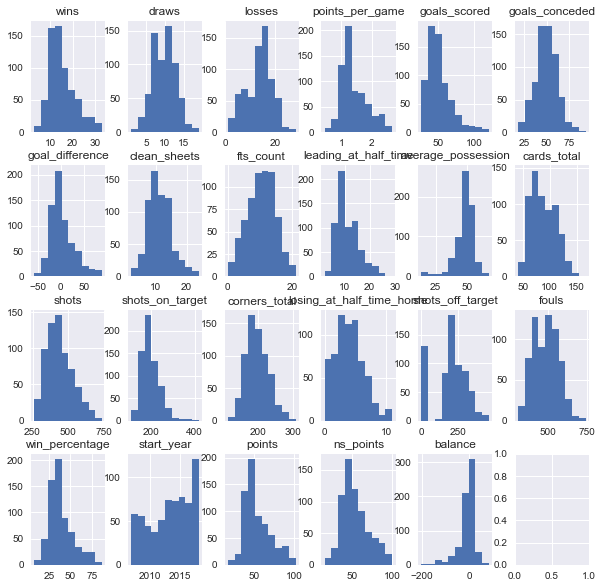

In [16]:
plt.style.use('seaborn')

# credit for histogram loop code to author of PoDS lab 2 feedback

numdf = df.select_dtypes(['float16', 'float32', 'float64', 'int16', 'int32', 'int64'])

numCols=numdf.shape[1]


fig, axisRows = plt.subplots(numCols//6+1, 6, figsize=(10, 10))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            numdf.hist(column = numdf.columns[i], bins = 10, ax=axis)
            i = i+1

In [17]:
df.drop('shots_off_target', axis = 1, inplace = True)

Most of the variables appear to be naturally normally distributed, so very little transformation - other than  a couple of columns such as goals scored, and maybe some standardisation - will be necessary

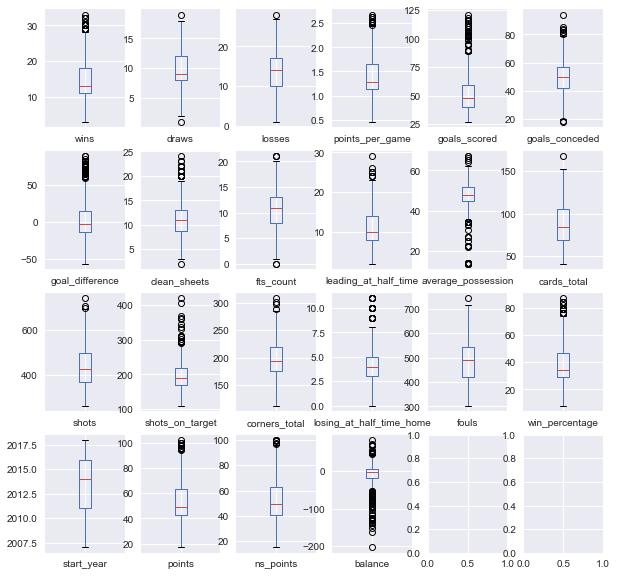

In [18]:
numdf = df.select_dtypes(['float16', 'float32', 'float64', 'int16', 'int32', 'int64'])

numCols=numdf.shape[1]


fig, axisRows = plt.subplots(numCols//6+1, 6, figsize=(10, 10))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            numdf.boxplot(column = numdf.columns[i], ax=axis)
            i = i+1

#### 5.3 Assessing Variable Collinearity

One thing that is likely to be rife in this data set is collinearity. This is important to be vigilant of when selecting a model. A heatmap can help identify which variables are the most correlated.

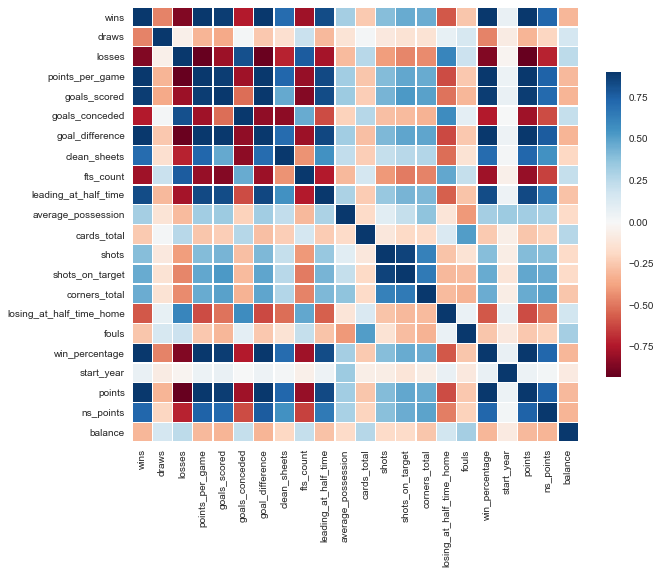

In [19]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(10,8))   
sns.heatmap(correlations, cmap = 'RdBu' , center = 0, vmax=.9, cbar_kws={'shrink':.7}, linewidths=.3, ax = ax);

First things that can be seen is that number of cards, number of draws, and the start year of the season have very little correlation with anything, so they can be dropped. Some columns like losing at half time at home and leading at half time are telling us slightly different things, but not different enough to justify their collinearity. The rest many of which are highly correlated, will be kept for the time being, and will be reduced in the modelling stage through applying a threshold to the lassoCV feature importance coefficients. This provides some empirical confidence and reasoning to the selection of features, which is preferred to attempting to reduce the features intuitively.

In [20]:
toDrop = ['fouls', 'draws', 'cards_total', 'leading_at_half_time']

df.drop(toDrop, axis = 1, inplace = True)

#### 5.4 Normalisation of skewed features

Next, some of the more skewed features should be log transformed, which should do a good job of moulding them to a normal distribution given their current distribution.

In [21]:
# log transforming the 'goals_scored' variable

df.goals_scored = df.goals_scored.apply(lambda x: np.log(x))
df.shots_on_target = df.shots_on_target.apply(lambda x: np.log(x))
df.shots = df.shots.apply(lambda x: np.log(x))

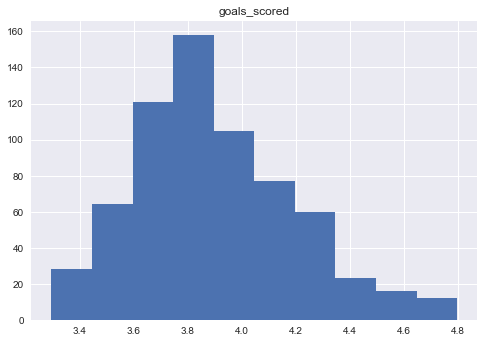

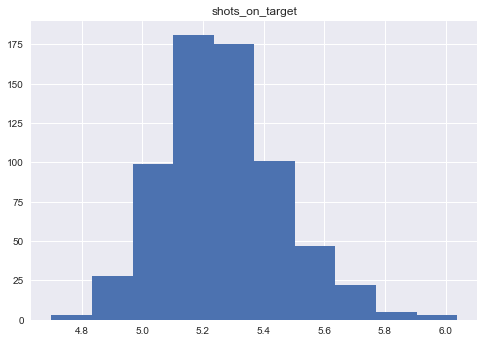

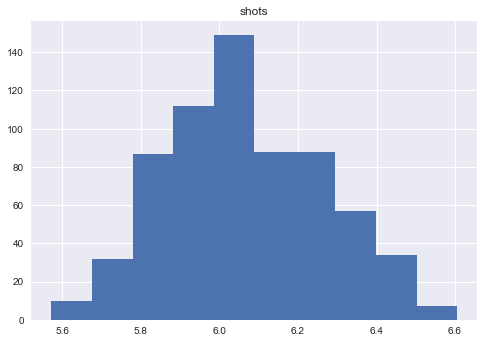

In [22]:
df.hist(column = 'goals_scored', bins = 10)
df.hist(column = 'shots_on_target', bins = 10)
df.hist(column = 'shots', bins = 10);

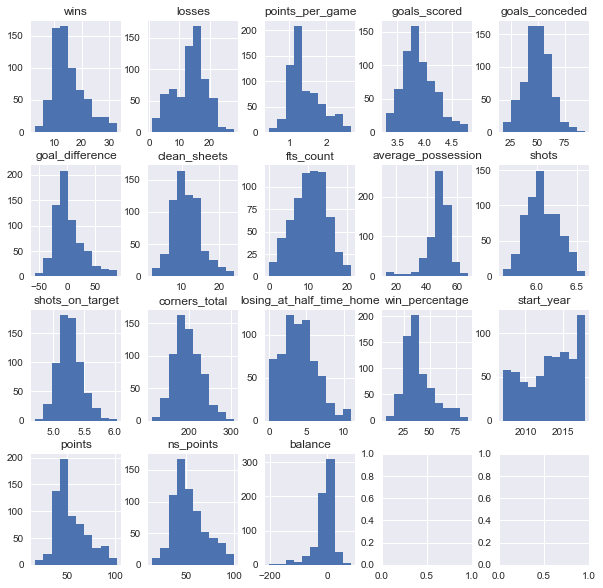

In [23]:
numdf = df.select_dtypes(['float16', 'float32', 'float64', 'int16', 'int32', 'int64'])

numCols=numdf.shape[1]


fig, axisRows = plt.subplots(numCols//5+1, 5, figsize=(10, 10))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            numdf.hist(column = numdf.columns[i], bins = 10, ax=axis)
            i = i+1

These now all look to have a pretty normal distribution. Nevertheless, a log transformation is applied below to all of the numeric variables in order to check whether any of them would benefit from it in terms of distribution shape.

In [24]:
df2 = pd.read_csv('data_prepped.csv')

In [25]:
numdf = df2.select_dtypes(['float16', 'float32', 'float64', 'int16', 'int32', 'int64'])

numdf.drop(['goal_difference', 'balance'], inplace = True, axis = 1)
numdf = numdf.applymap(lambda x: np.log(x) if x != 0 else x)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


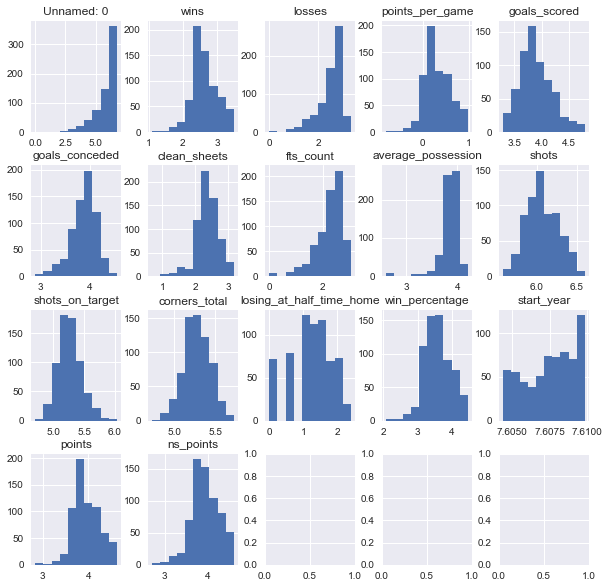

In [26]:
numCols=numdf.shape[1]


fig, axisRows = plt.subplots(numCols//5+1, 5, figsize=(10, 10))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            numdf.hist(column = numdf.columns[i], bins = 10, ax=axis)
            i = i+1

No more of the variables appear to benefit from log transformation. The scales of the variables are highly varied however, as it the centering, which may be something to address later, especially with the standardization and normalization requirements that linear models of regression tend to have.

#### 5.5 visualisation of data to understand trends and characteristics

Unlike many other studies, which only use data from one nation or league as input for their machine learning models, this data set contains data from the 4 biggest football leagues in Europe. It should be treated with caution and explored, as different styles of play can perhaps result in different statistics (for example, England is known for being a more aggressive, fast-paced league, so high average possession may not be as big an indicator of team success than in other leagues). It should be checked whether these nuances in style could have an impact when training the model and predicting rankings from a specific league.

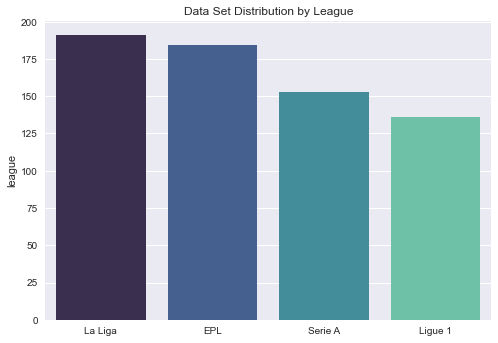

In [27]:
# creating a bar plot of how much data is from which league
cmap = sns.color_palette("flare", as_cmap=True)
cats = df.league.value_counts()
bar = sns.barplot(x = cats.index, y = cats, palette = 'mako')
bar.set_xticklabels(bar.get_xticklabels())
bar.set_title('Data Set Distribution by League')
plt.show()

In [88]:
pd.pivot_table(df, index = 'league', values = ['points', 'goals_scored', 'average_possession',\
                                               'fts_count', 'balance'])

,average_possession,balance,fts_count,goals_scored,points
league,,,,,
EPL,49.644397,-27.669582,10.429348,3.925446,54.288043
La Liga,46.895911,-2.388435,10.376963,3.927485,54.183246
Ligue 1,45.237042,-1.292919,10.948529,3.849895,53.779412
Serie A,48.441659,-4.730752,10.215686,3.905841,53.333333


Financial investment is significantly higher in England, highlighting the extremely high standard and level of status the league holds in the country. Possession is also slightly higher in England, but other than that, the leagues mostly hold the same characteristics, at least on paper, which gives credence to the present study's use of data from all leagues.

Two other variables that are more or less communicating the same information would be 'wins' and 'win_percentage', so one of them shall be dropped. From the heatmap, it can be seen that they more or less have the same level of correlation with the target variable, however, as it is a strong one, the number of wins metric will be preferred as it will not be as likely to create a bias as the larger-scale win percentage metric.

In [29]:
df.drop('win_percentage', axis = 1, inplace = True)

In [30]:
corrs = df.corr()
corrs.iloc[:, 15]

wins                        0.731744
losses                     -0.710056
points_per_game             0.747969
goals_scored                0.708636
goals_conceded             -0.605821
goal_difference             0.767043
clean_sheets                0.562805
fts_count                  -0.631181
average_possession          0.302145
shots                       0.378875
shots_on_target             0.459538
corners_total               0.497264
losing_at_half_time_home   -0.474016
start_year                  0.024247
points                      0.748027
ns_points                   1.000000
balance                    -0.312202
Name: ns_points, dtype: float64

The predictors are looking strong, and there is no one variable that dominates which is hopefully good for reducing bias. The start year variable will be kept for a little while longer in order to determine the test-train split, which will need to be split in a regimented way to ensure that the test set contains sets of data points that constitute an entire season, so that league rankings can be determined by sorting the regression predictions in order.

##### *Further visual EDA was conducted in Tableau, some figures from which can be found in the report.

## <font color='blue'>6. Modelling </font>

The type of regression to be used to predict next season points needs to be something that is robust to collinearity, either that or the data needs to be further whittled down to fewer columns. Linear regression, as well as lasso and ridge regression will be attemped, as well as an ensemble learner such as random forest.

> 1. choose relevant columns
> 2. train-test split
> 3. multiple linear regression
> 4. lasso & ridge regression
> 5. random forest
> 6. support vector regression
> 7. test models

#### 6.1 Selecting relevant columns

For the time being, season, club, and league will be included, as they will be important in the train-test split process.

In [32]:
df_mdl = df[['club', 'league', 'start_year', 'wins', 'losses', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 'clean_sheets',\
            'fts_count', 'average_possession', 'shots', 'shots_on_target', 'corners_total', 'losing_at_half_time_home',\
            'points', 'balance', 'ns_points']]

df_mdl.reset_index(inplace = True)

#### 6.2 Train-test split

It is desired to pick out particular values for the test set in this instance, as having a full set of values from the same season and league will allow the present author to be able to order their predicted points in order to form a predicted league table, which can then be compared against the actual league table that transpired.

In [33]:
df_mdl.start_year.value_counts()

2015    78
2013    74
2014    73
2016    71
2017    70
2009    56
2018    51
2012    51
2008    46
2010    44
2011    38
2007    12
Name: start_year, dtype: int64

In [34]:
# visualising which seasons have the most complete data, i.e 20 rows for each team, including their next season points
# tally

pd.options.display.max_columns = 28

counts = df_mdl.groupby(['start_year', 'league']).count()
counts

index  club  wins  losses  points_per_game  goals_scored  \
start_year league                                                              
2007       EPL         12    12    12      12               12            12   
2008       EPL         15    15    15      15               15            15   
           La Liga     16    16    16      16               16            16   
           Serie A     15    15    15      15               15            15   
2009       EPL         14    14    14      14               14            14   
           La Liga     16    16    16      16               16            16   
           Ligue 1     12    12    12      12               12            12   
           Serie A     14    14    14      14               14            14   
2010       EPL         14    14    14      14               14            14   
           La Liga     14    14    14      14               14            14   
           Ligue 1     16    16    16      16               16            16   
2011       EPL          3     3     3       3                3             3   
           La Liga     16    16    16      16               16            16   
           Ligue 1     19    19    19      19               19            19   
2012       EPL         17    17    17      17               17            17   
           La Liga     19    19    19      19               19            19   
           Serie A     15    15    15      15               15            15   
2013       EPL         19    19    19      19               19            19   
           La Liga     20    20    20      20               20            20   
           Ligue 1     17    17    17      17               17            17   
           Serie A     18    18    18      18               18            18   
2014       EPL         19    19    19      19               19            19   
           La Liga     17    17    17      17               17            17   
           Ligue 1     18    18    18      18               18            18   
           Serie A     19    19    19      19               19            19   
2015       EPL         20    20    20      20               20            20   
           La Liga     20    20    20      20               20            20   
           Ligue 1     19    19    19      19               19            19   
           Serie A     19    19    19      19               19            19   
2016       EPL         17    17    17      17               17            17   
           La Liga     19    19    19      19               19            19   
           Ligue 1     17    17    17      17               17            17   
           Serie A     18    18    18      18               18            18   
2017       EPL         17    17    17      17               17            17   
           La Liga     17    17    17      17               17            17   
           Ligue 1     18    18    18      18               18            18   
           Serie A     18    18    18      18               18            18   
2018       EPL         17    17    17      17               17            17   
           La Liga     17    17    17      17               17            17   
           Serie A     17    17    17      17               17            17   

                    goals_conceded  goal_difference  clean_sheets  fts_count  \
start_year league                                                              
2007       EPL                  12               12            12         12   
2008       EPL                  15               15            15         15   
           La Liga              16               16            16         16   
           Serie A              15               15            15         15   
2009       EPL                  14               14            14         14   
           La Liga              16               16            16         16   
           Ligue 1 

The year 2015 will be chosen to set aside all leagues' data, and use as a test set in order to rank teams in their respective leagues, as there are the least gaps in team data from team relegation resulting in them not having next season points values. Also included to make up a more substantial test set will be the 2013 season of Spain's La Liga, as that is the only other season which includes data rows for all 20 teams that partook in the season.

In [35]:
indexes = []
for index, row in df_mdl.iterrows():
    if row.start_year == 2015:
        indexes.append(index)
    elif row.start_year == 2013:
        if row.league == 'La Liga':
            indexes.append(index)


In [37]:
print(len(indexes))

98


In [38]:
test_split_proportions = 98/df.shape[0]
test_split_proportions

0.14759036144578314

A 15% test set will be ample to comment on, and will also give precious more data points to train the model on. No validation set will be necessary as cross-validation will be employed for all model building.

In [39]:
mdl_test = df_mdl.iloc[indexes, :]

In [41]:
df_train = df_mdl.drop(indexes)

In [42]:
df_train.drop(['start_year', 'club', 'league'], axis = 1, inplace = True)

In [43]:
xTrain = df_train.drop(['ns_points', 'index'], axis = 1)
yTrain = df_train['ns_points'].values
xTest = mdl_test.drop(['ns_points', 'start_year', 'club', 'league', 'index'], axis = 1)
yTest = mdl_test['ns_points'].values


%store xTrain
%store yTrain
%store xTest
%store yTest

Stored 'xTrain' (DataFrame)
Stored 'yTrain' (ndarray)
Stored 'xTest' (DataFrame)
Stored 'yTest' (ndarray)


#### 6.3 Model construction and validation (multiple linear regression)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

trimmed_xTrain = xTrain[['goal_difference', 'corners_total', 'points', 'balance']]

lr = LinearRegression()
lr.fit(trimmed_xTrain, yTrain)

trimmed_xTest = xTest[['goal_difference', 'corners_total', 'points', 'balance']]

trimmed_lr_preds = lr.predict(trimmed_xTest)

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('trimmed linear regression MAE: '+str(mae(yTest, trimmed_lr_preds)))
print('trimmed linear regression r2: '+str(r2_score(yTest, trimmed_lr_preds)))

trimmed linear regression MAE: 9.136471947973195
trimmed linear regression r2: 0.6242714676349318


In [437]:
# following code based on PoDS modelling labs as well as sklearn's documentation website:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# i also followed along with a youtube tutorial, the git for which is linked below:
# https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py

# sklearn linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler().fit(xTrain)
normalizer = Normalizer().fit(xTrain)

xTrain_scaled = scaler.transform(xTrain)
xTrain_scaled_normalized = normalizer.transform(xTrain_scaled)

lr = LinearRegression()
lr.fit(xTrain, yTrain)

lr_scaled = LinearRegression()
lr_scaled.fit(xTrain_scaled, yTrain)

print(cross_val_score(lr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('linear regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(lr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('linear regression r2: '\
      +str(np.mean(cross_val_score(lr, xTrain, yTrain, scoring = 'r2', cv = 10))))

# neg_mean_absolute_error preferred as it gives a good interpretability of how close predictions are to actual values

print(cross_val_score(lr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('standardized linear regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(lr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('standardizedlinear regression r2: '\
      +str(np.mean(cross_val_score(lr_scaled, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[-8.89142709 -7.39580223 -9.84432107 -8.67400277 -7.36891699 -8.13292279
 -7.86719836 -8.35125836 -7.50325844 -8.41341375]
linear regression negative mean absolute error: -8.244252184617654
linear regression r2: 0.5851453022544674
[-8.89142709 -7.39580223 -9.84432107 -8.67400277 -7.36891699 -8.13292279
 -7.86719836 -8.35125836 -7.50325844 -8.41341375]
standardized linear regression negative mean absolute error: -8.244252184617633
standardizedlinear regression r2: 0.5851453022544681


The linear regression from sklearn appears capable of predicting within 10 points of the actual following season points total, and when averaged across folds, the model predicts within 8.26 points of the actual value, which is a fairly good result. The scaled version performs minutely worse than the unscaled version. With the suspected high levels of multicollinearity, it may be worth comparing the linear regression model with lasso and ridge regression models, which are more suited to inter-correlated independent variables, and therefore may be be able to a) yield a stronger validation result, and b) indicate what features can be derived from others and thus reduce the complexity of the feature set.

#### 6.4 Comparing with lasso and ridge regression

##### 6.4.1 Lasso regression

In [438]:
# again, the following code structue was taken from sklearn's documentation for each of these methods:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

from sklearn.linear_model import Lasso

# lasso for regular data set
llr = Lasso()
llr.fit(xTrain, yTrain)

# lasso for scaled data set
llr_scaled = Lasso()
llr_scaled.fit(xTrain_scaled, yTrain)

llr_scaled_normalized = Lasso()
llr_scaled_normalized.fit(xTrain_scaled_normalized, yTrain)

# cv for regular lasso
print(cross_val_score(llr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('Lasso MAE: '+\
      str(np.mean(cross_val_score(llr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('Lasso r2: '+\
      str(np.mean(cross_val_score(llr, xTrain, yTrain, scoring = 'r2', cv = 10))))

# cv for scaled lasso
print(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('Standardized lasso MAE: '+\
      str(np.mean(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('standardized lasso r2: '+\
      str(np.mean(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))
      
# for the scaled and normalized lasso
print(cross_val_score(llr_scaled_normalized, xTrain_scaled_normalized, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('standardized and normalized lasso MAE :'+\
      str(np.mean(cross_val_score(llr_scaled_normalized, xTrain_scaled_normalized, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('standardized and normalized lasso r2: '+\
      str(np.mean(cross_val_score(llr_scaled_normalized, xTrain_scaled_normalized, yTrain, scoring = 'r2', cv = 10))))      

[-8.95110368 -7.09500526 -9.77919671 -8.34305534 -7.1385254  -8.16291164
 -7.8815884  -8.42491398 -7.42560467 -8.2580192 ]
Lasso MAE: -8.145992428591882
Lasso r2: 0.5970396805741844
[-9.09822141 -7.05762124 -9.89154811 -8.75147636 -7.09069913 -7.95264594
 -7.91641418 -8.28565626 -7.26210981 -8.47880751]
Standardized lasso MAE: -8.178519996770117
standardized lasso r2: 0.5919399332719405
[-10.23903662  -7.87186322 -11.25564794 -10.01176665  -9.11323134
  -9.63797634  -9.23512881 -10.54964606  -8.84699221  -9.99401008]
standardized and normalized lasso MAE :-9.675529928059962
standardized and normalized lasso r2: 0.43777595098118977


This model starts out performing ever so slightly better than the regular multple regression, but can be tuned further by manipulating the alpha value of Lasso regression, which in sklearn's api is set to 1 as default. Unexpectedly, the unaltered version of the data again yielded a slightly smaller Mean absolute error than the other modified versions, despite linear algorithm's preference for scaled data.

In [439]:
# looping over alpha values to find the optimum, taken and adjusted from:
# https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py

a = []
err = []

for each in range(1,501):
    a.append(each/500)
    llr = Lasso(alpha=(each/500))
    err.append(np.mean(cross_val_score(llr,xTrain,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19307.051487465324, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19610.6459303184, tolerance: 14.501250294695481
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18309.679990227756, tolerance: 13.675475442043224
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19362.323148795273, tolerance: 14.216796274509806
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19249.140474172797, tolerance: 13.957587450980393
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19343.78100000006, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18745.710049467714, tolerance: 13.567667450980395
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19387.168859291865, tolerance: 14.216796274509806
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19284.340887100676, tolerance: 13.957587450980393
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18978.097258001377, tolerance: 14.062553241650296
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19756.368549383773, tolerance: 14.028062941176469
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18757.187706356548, tolerance: 13.567667450980395
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19360.088407882267, tolerance: 13.968482121807465
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19961.109594919624, tolerance: 14.030477406679763
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18984.030651240362, tolerance: 14.062553241650296
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18985.27195373842, tolerance: 14.062553241650296
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19777.774495822647, tolerance: 14.028062941176469
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10757.010325437026, tolerance: 13.567667450980395
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780.3068519509106, tolerance: 14.028062941176469
  model = cd_fast.enet_coordinate_descent(


In [440]:
print(max(err))

-8.145992428591882


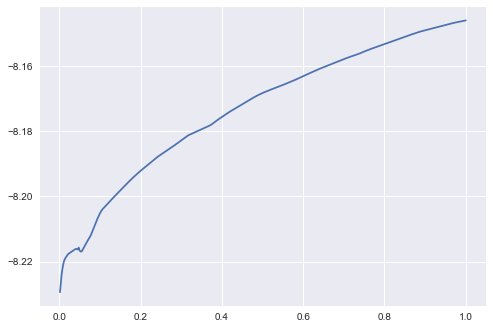

In [441]:
plt.plot(a, err);

In [442]:
a = []
err = []

for each in range(1,501):
    a.append(each/500)
    llr_scaled = Lasso(alpha=(each/500))
    err.append(np.mean(cross_val_score(llr_scaled,xTrain_scaled,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11668.40570185176, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12505.6542703511, tolerance: 14.501250294695481
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7154.020728068059, tolerance: 13.675475442043224
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordi

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.38912631549465, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.50215093012957, tolerance: 13.675475442043224
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.547842220701568, tolerance: 13.968482121807465
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.735450175532605, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.091273444355465, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.542290793680877, tolerance: 13.990304125736738
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

In [443]:
print(max(err))

-8.137687860571502


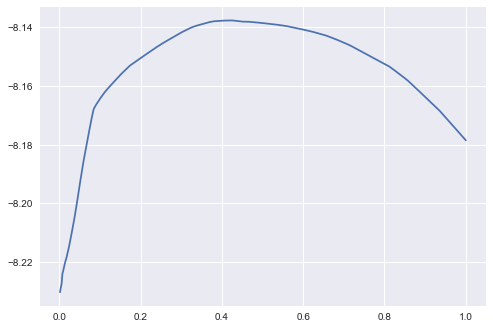

In [444]:
plt.plot(a, err);

With tuning of the alpha parameter for the unscaled data, default value of 1 was best, whereas the scaled data was much more responsive to some variance of alpha. As can be seen from the plot above, the best MAE was for an alpha value of around 0.4.

In [445]:
a_err_dict = dict(zip(a, err))

In [446]:
# following method for itentifying key with the greatest value taken from:
# https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary

import operator

max(a_err_dict.items(), key=operator.itemgetter(1))[0]

0.422

In [447]:
# building the optimized lasso model
llr_scaled = Lasso(alpha = 0.422)
llr_scaled.fit(xTrain_scaled, yTrain)

# cv for optimized, scaled lasso
print(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('lasso MAE: '+\
      str(np.mean(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('lasso r2: '+\
     str(np.mean(cross_val_score(llr_scaled, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[-8.96382836 -7.17640639 -9.81069964 -8.65378527 -7.07844853 -7.97967334
 -7.89553444 -8.22648802 -7.23210976 -8.35990486]
lasso MAE: -8.137687860571502
lasso r2: 0.5969075100343982


This is the best result seen so far, as is to be expected given the lasso regression's assumption of standardisation of the input data to avoid bias. Some improvement may be drawn however from the useful feature reduction tools of LassoCV, as it may aid generlisability in the cross-validation and test sets.

In [448]:
# code reference:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

from sklearn.linear_model import LassoCV

lcv = LassoCV().fit(xTrain, yTrain)
featureimportance = np.abs(lcv.coef_)
print(featureimportance)

[0.         0.         0.         0.         0.         0.38054597
 0.         0.         0.         0.         0.         0.06080051
 0.         0.09986143 0.04741038]


Only a few variables contribute to the explaining the variance in the data. This would likely be down to the inevtiably high levels of multicollinearity between some of the variables included in the data set. As can be seen below, the variables that are deemed useful can derive much of the other variables which were not (e.g. goal difference can largely derive goals scored and clean sheets, and points can most certainly derive points per game.

In [449]:
toKeep = []
for index, each in enumerate(featureimportance):
    if each > 0:
        toKeep.append(index)
        
print(xTrain.columns[toKeep])  

Index(['goal_difference', 'corners_total', 'points', 'balance'], dtype='object')


In [450]:
trimmed_xTrain_scaled = xTrain_scaled[:, toKeep]
trimmed_xTrain_scaled_normalized = xTrain_scaled_normalized[:, toKeep]

a = []
err = []

for each in range(1,501):
    a.append(each/500)
    llr = Lasso(alpha=(each/500))
    err.append(np.mean(cross_val_score(llr,trimmed_xTrain_scaled,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

In [451]:
print(max(err))

-8.113956415900223


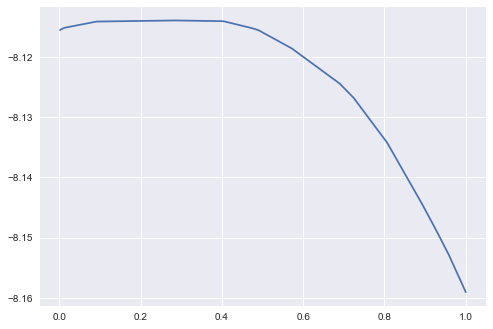

In [452]:
plt.plot(a, err);

In [454]:
a_err_dict = dict(zip(a, err))
max(a_err_dict.items(), key=operator.itemgetter(1))[0]

0.282

In [457]:
a = []
err = []

for each in range(1,501):
    a.append(each/500)
    llr = Lasso(alpha=(each/500))
    err.append(np.mean(cross_val_score(llr,trimmed_xTrain_scaled_normalized,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

In [458]:
print(max(err))

-8.71545890774353


In [455]:
trimmed_xTrain = xTrain[['goal_difference', 'corners_total', 'points', 'balance']]

a = []
err = []

for each in range(1,501):
    a.append(each/500)
    llr = Lasso(alpha=(each/500))
    err.append(np.mean(cross_val_score(llr,trimmed_xTrain,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

-8.11423939797321


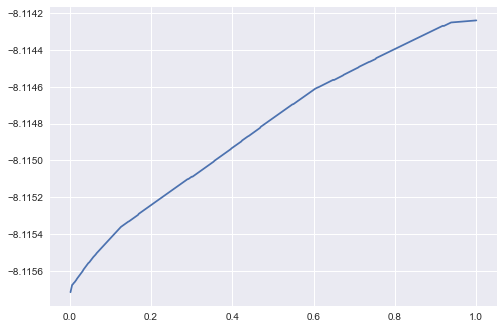

In [456]:
print(max(err))
plt.plot(a, err);

The error can be seen to reduce here as the alpha increases, meaning that the best performing model will be that with the default alpha value of 1. The final, best lasso model can now be built below, which in the end was a model built on a reduced version of the standard data.

In [461]:
# Best Lasso model 

llr = Lasso()
llr.fit(trimmed_xTrain, yTrain)

print(cross_val_score(llr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('lasso regression MAE: '\
      +str(np.mean(cross_val_score(llr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('lasso regression r2: '\
      +str(np.mean(cross_val_score(llr, trimmed_xTrain, yTrain, scoring = 'r2', cv = 10))))

llr_scaled = Lasso(alpha = 0.282)
llr_scaled.fit(trimmed_xTrain_scaled, yTrain)

print(cross_val_score(llr_scaled, trimmed_xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('lasso regression MAE: '\
      +str(np.mean(cross_val_score(llr_scaled, trimmed_xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('lasso regression r2: '\
      +str(np.mean(cross_val_score(llr_scaled, trimmed_xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[-8.95721297 -6.99473112 -9.7748925  -8.25973252 -6.95607152 -8.20752947
 -7.8889355  -8.44270092 -7.43273646 -8.227851  ]
lasso regression MAE: -8.11423939797321
lasso regression r2: 0.5992370842771847
[-8.99077937 -6.9776445  -9.79387922 -8.34709294 -6.97680579 -8.16704759
 -7.89800482 -8.36771979 -7.37250957 -8.24808056]
lasso regression MAE: -8.113956415900223
lasso regression r2: 0.5988760429533999


##### 6.4.2 Ridge regression

In [462]:
from sklearn.linear_model import Ridge

# regular ridge on unscaled data
rr = Ridge()
rr.fit(xTrain, yTrain)

print(cross_val_score(rr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('ridge regression MAE: '\
      +str(np.mean(cross_val_score(rr, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('ridge regression r2: '\
      +str(np.mean(cross_val_score(lr, xTrain, yTrain, scoring = 'r2', cv = 10))))

[-8.89523414 -7.37934701 -9.80536712 -8.6496449  -7.36111304 -8.07664506
 -7.87143858 -8.33767568 -7.51774974 -8.37199225]
ridge regression MAE: -8.22662075063953
ridge regression r2: 0.5851453022544674


In [463]:
# ridge regression on unscaled data with inbuilt normalization function on

rr_normalized = Ridge(normalize = True)
rr.fit(xTrain, yTrain)

print(cross_val_score(rr_normalized, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('ridge regression MAE: '\
      +str(np.mean(cross_val_score(rr_normalized, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('ridge regression r2: '\
      +str(np.mean(cross_val_score(rr_normalized, xTrain, yTrain, scoring = 'r2', cv = 10))))

[ -9.08031053  -7.59103712 -10.18122712  -8.86803917  -7.26528981
  -8.10891107  -8.04799074  -8.31425025  -7.07977053  -8.32623585]
ridge regression MAE: -8.286306218471731
ridge regression r2: 0.5854335373638462


In [464]:
# ridge regression on standardized data

rr_scaled = Ridge()
rr_scaled.fit(xTrain_scaled, yTrain)

print(cross_val_score(rr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('standardized ridge regression MAE: '\
      +str(np.mean(cross_val_score(rr_scaled, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('standardized ridge regression r2: '\
      +str(np.mean(cross_val_score(rr_scaled, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[-8.89589569 -7.40342096 -9.83597971 -8.67904096 -7.32105481 -8.08471316
 -7.88468295 -8.35546619 -7.47144672 -8.39917792]
standardized ridge regression MAE: -8.233087905968363
standardized ridge regression r2: 0.5876609823926725


In [465]:
# ridge regression on both standardized and normalized data

rr_scaled_normalized = Ridge(normalize = True)
rr_scaled_normalized.fit(xTrain_scaled, yTrain)

print(cross_val_score(rr_scaled_normalized, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('standardized & normalized ridge regression MAE: '\
      +str(np.mean(cross_val_score(rr_scaled_normalized, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('standardized & normalized ridge regression r2: '\
      +str(np.mean(cross_val_score(rr_scaled, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[ -9.08031053  -7.59103712 -10.18122712  -8.86803917  -7.26528981
  -8.10891107  -8.04799074  -8.31425025  -7.07977053  -8.32623585]
standardized & normalized ridge regression MAE: -8.286306218471733
standardized & normalized ridge regression r2: 0.5876609823926725


In [466]:
# ridge regression run on the reduced feature set

rr = Ridge()

rr.fit(trimmed_xTrain, yTrain)

print(cross_val_score(rr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('trimmed ridge regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(rr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('trimmed ridge regression r2: '\
      +str(np.mean(cross_val_score(lr, trimmed_xTrain, yTrain, scoring = 'r2', cv = 10))))

[-8.9426209  -7.00495356 -9.76909774 -8.26059315 -6.96926733 -8.22454386
 -7.899105   -8.44957566 -7.42631587 -8.21128062]
trimmed ridge regression negative mean absolute error: -8.11573537040262
trimmed ridge regression r2: 0.5992690581627339


In [467]:
a = []
err = []

for each in range(1,501):
    a.append(each/500)
    rr = Ridge(alpha=(each/500))
    err.append(np.mean(cross_val_score(rr,trimmed_xTrain,yTrain, scoring = 'neg_mean_absolute_error', cv= 10)))

In [468]:
print(max(err))

-8.11573510580441


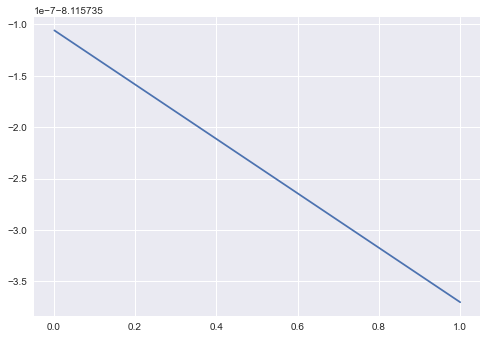

In [469]:
plt.plot(a, err);

In [470]:
a_err_dict = dict(zip(a, err))
max(a_err_dict.items(), key=operator.itemgetter(1))[0]

0.002

In [473]:
# best ridge model 

rr = Ridge(0.002)

rr.fit(trimmed_xTrain, yTrain)

print(cross_val_score(rr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('ridge regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(rr, trimmed_xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('ridge regression r2: '\
      +str(np.mean(cross_val_score(lr, trimmed_xTrain, yTrain, scoring = 'r2', cv = 10))))

[-8.94261731 -7.00495334 -9.76909112 -8.26059228 -6.96926123 -8.22454501
 -7.89910249 -8.44958054 -7.42632224 -8.21128549]
ridge regression negative mean absolute error: -8.11573510580441
ridge regression r2: 0.5992690581627339


So from the linear models, the best performance was that of the lasso regression, after reducing the features based on the lassoCV coefficients. This is only minute difference across the 3 however, as error is still within just over 8 points generally.

In [474]:
# storing all trained models in the ipython space

%store lr_scaled
%store llr
%store llr_scaled
%store rr

Stored 'lr_scaled' (LinearRegression)
Stored 'llr' (Lasso)
Stored 'llr_scaled' (Lasso)
Stored 'rr' (Ridge)


#### 6.5 Random forest

In [475]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

print(cross_val_score(rf, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('random forest regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(rf, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('random forest regression r2: '\
      +str(np.mean(cross_val_score(rf, xTrain, yTrain, scoring = 'r2', cv = 10))))

[-9.67929825 -8.30140351 -9.45631579 -9.11719298 -8.17192982 -8.20140351
 -8.06053571 -8.23571429 -8.32017857 -7.84625   ]
random forest regression negative mean absolute error: -8.539344924812031
random forest regression r2: 0.5444674105356302


Not as good results as the lasso regression, but random forests tend to benefit very well from hyperparameter tuning as there are quite a few to tune.

In [476]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':range(10,250,10), 'criterion':['mae'], 'max_features':('sqrt','auto','log2')}

gridsearch = GridSearchCV(rf,param_grid,scoring='neg_mean_absolute_error',cv=10)

rf_mdl = gridsearch.fit(xTrain, yTrain)

In [477]:
print(rf_mdl.best_score_)
print(rf_mdl.best_estimator_)
print(rf_mdl.best_estimator_.feature_importances_)

-8.26641283606744
RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=220)
[0.07975447 0.07430586 0.09453654 0.07114333 0.0604868  0.13368407
 0.04449283 0.04326994 0.0524184  0.05239999 0.05025772 0.06465877
 0.03277981 0.08764195 0.05816951]


The random forest seems to use all of the features to some small extent. nevertheless, the random forest will still be fit and tuned to the trimmed data, as well as the scaled data to check.

In [478]:
# attempting random forest for the trimmed data

trimmed_rf = gridsearch.fit(trimmed_xTrain, yTrain)

print(trimmed_rf.best_score_)
print(trimmed_rf.best_estimator_)
print(trimmed_rf.best_estimator_.feature_importances_)

-8.49671992481203
RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=110)
[0.33910438 0.20018973 0.27049144 0.19021444]


In [479]:
# attempting random forest for the scaled data

rf_scaled = gridsearch.fit(xTrain_scaled, yTrain)

print(rf_scaled.best_score_)
print(rf_scaled.best_estimator_)
print(rf_scaled.best_estimator_.feature_importances_)

-8.28486346073517
RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=120)
[0.0634425  0.07516713 0.10524086 0.07432889 0.05765927 0.13001432
 0.04250797 0.04374708 0.05106282 0.05247337 0.05147118 0.06414285
 0.03327319 0.09924482 0.05622375]


Results still do not beat the linear model's performance.

In [480]:
# best performing random forest model

rf = RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=220)
rf.fit(xTrain, yTrain)

print(cross_val_score(rf, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('random forest regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(rf, xTrain, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('random forest regression r2: '\
      +str(np.mean(cross_val_score(rf, xTrain, yTrain, scoring = 'r2', cv = 10))))

[-8.98692185 -8.07735247 -9.17400319 -8.88532695 -7.94561404 -8.14732855
 -8.07909903 -7.99338474 -7.98084416 -8.01112013]
random forest regression negative mean absolute error: -8.322230505240373
random forest regression r2: 0.5683268161515549


In [481]:
%store rf

Stored 'rf' (RandomForestRegressor)


#### 6.6 Support vector machine

In [482]:
from sklearn.svm import SVR

svm = SVR()

print(cross_val_score(svm, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('Support vector regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(svm, xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('support vector regression r2: '\
      +str(np.mean(cross_val_score(svm, xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[ -9.86157426  -8.32757458 -10.78195766  -9.46696122  -8.89224721
  -9.16763089  -7.92527669  -8.81182101  -8.29829918  -8.62859274]
Support vector regression negative mean absolute error: -9.016193542217888
support vector regression r2: 0.5100852737413555


In [483]:
params = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'gamma': ('auto', 'scale'), 'C': range(1, 10),\
         'epsilon': (0.05, 0.075, 0.1, 0.125, 0.15)}

svm_gridsearch = GridSearchCV(svm, params ,scoring='neg_mean_absolute_error',cv=10)

svm = svm_gridsearch.fit(xTrain_scaled, yTrain)

print(svm_gridsearch.best_score_)
print(svm_gridsearch.best_estimator_)

-8.237765406703412
SVR(C=1, epsilon=0.05, gamma='auto', kernel='linear')


In [484]:
svm = svm_gridsearch.fit(trimmed_xTrain_scaled, yTrain)

print(svm_gridsearch.best_score_)
print(svm_gridsearch.best_estimator_)

-8.111671916419024
SVR(C=9, epsilon=0.15, gamma='auto', kernel='linear')


In [485]:
svm = svm_gridsearch.fit(trimmed_xTrain_scaled_normalized, yTrain)

print(svm_gridsearch.best_score_)
print(svm_gridsearch.best_estimator_)

-8.57064565582181
SVR(C=3, epsilon=0.15)


In [486]:
# best svm model

svm = SVR(C = 9, epsilon = 0.15, gamma = 'auto', kernel = 'linear')
svm.fit(trimmed_xTrain_scaled, yTrain)

print(cross_val_score(svm, trimmed_xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))
print('Support vector regression negative mean absolute error: '\
      +str(np.mean(cross_val_score(svm, trimmed_xTrain_scaled, yTrain, scoring = 'neg_mean_absolute_error', cv = 10))))
print('support vector regression r2: '\
      +str(np.mean(cross_val_score(svm, trimmed_xTrain_scaled, yTrain, scoring = 'r2', cv = 10))))

[-8.88839755 -7.14612171 -9.65560156 -8.32542186 -6.91750512 -8.16915595
 -7.84232175 -8.46380626 -7.32540316 -8.38298424]
Support vector regression negative mean absolute error: -8.111671916419024
support vector regression r2: 0.5978680673919534


In [487]:
%store svm

Stored 'svm' (SVR)


#### 6.7 Testing the models on the holdout test set

In [496]:
# modifying the test set in accordanec with the different versions the best models were trained on

trimmed_xTest = xTest[['goal_difference','corners_total', 'points', 'balance']]


xTest_scaled = scaler.transform(xTest)
trimmed_xTest_scaled = xTest_scaled[:, toKeep]

# creating a linear regression with the reduced features as that was not attempted

trimmed_lr = LinearRegression()
trimmed_lr.fit(trimmed_xTrain, yTrain)

# making the predictions with the best-trained model of each method

trimmed_lr_preds = trimmed_lr.predict(trimmed_xTest)
lr_preds = lr.predict(xTest)
lr_scaled_preds = lr_scaled.predict(xTest_scaled)
llr_preds = llr.predict(trimmed_xTest)
llr_scaled_preds = llr_scaled.predict(trimmed_xTest_scaled)
rr_preds = rr.predict(trimmed_xTest)
rf_preds = rf.predict(xTest)
svm_preds = svm.predict(trimmed_xTest_scaled)


# reporting the negative mean absolute error and the r2 score for each method

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('trimmed linear regression MAE: '+str(mae(yTest, trimmed_lr_preds)))
print('trimmed linear regression r2: '+str(r2_score(yTest, trimmed_lr_preds)))

print('linear regression MAE: '+str(mae(yTest, lr_preds)))
print('linear regression r2: '+str(r2_score(yTest, lr_preds)))

print('scaled linear regression MAE: '+str(mae(yTest, lr_scaled_preds)))
print('scaled linear regression r2: '+str(r2_score(yTest, lr_scaled_preds)))

print('lasso regression MAE (features reduced): ' + str(mae(yTest, llr_preds)))
print('lasso regression r2 (features reduced): ' + str(r2_score(yTest, llr_preds)))

print('scaled lasso regression MAE (features reduced): ' + str(mae(yTest, llr_scaled_preds)))
print('scaled lasso regression r2 (features reduced): ' + str(r2_score(yTest, llr_scaled_preds)))

print('ridge regression MAE (features reduced): ' + str(mae(yTest, rr_preds)))
print('ridge regression r2 (features reduced): ' + str(r2_score(yTest, rr_preds)))

print('random forest regression MAE (features reduced): ' + str(mae(yTest, rf_preds)))
print('random forest regression r2 (features reduced): ' + str(r2_score(yTest, rf_preds)))

print('svm regression MAE (features reduced): ' + str(mae(yTest, svm_preds)))
print('svm regression r2 (features reduced): ' + str(r2_score(yTest, svm_preds)))

trimmed linear regression MAE: 9.136471947973195
trimmed linear regression r2: 0.6242714676349318
linear regression MAE: 9.148817783725859
linear regression r2: 0.6242137803272525
scaled linear regression MAE: 9.148817783725836
scaled linear regression r2: 0.6242137803272535
lasso regression MAE (features reduced): 9.140936916856518
lasso regression r2 (features reduced): 0.6240630208144559
scaled lasso regression MAE (features reduced): 9.230781112754899
scaled lasso regression r2 (features reduced): 0.6219364106966112
ridge regression MAE (features reduced): 9.136471962428768
ridge regression r2 (features reduced): 0.6242714673587654
random forest regression MAE (features reduced): 9.390468460111316
random forest regression r2 (features reduced): 0.6064015334345049
svm regression MAE (features reduced): 9.291697200569537
svm regression r2 (features reduced): 0.6124407972472717


It can be seen that the linear regression model trained on the entire set of features outperforms the others by slim margins in terms of both negative mean absolute error and r2 score. A notable decrease in performance can also be seen for all models between the training set and the test set, typically around 1 point in MAE. This could be attributed to a slight case of overfitting. It could also be the case that there is some selection bias present, given the purposeful extraction of the test set based on the availability of a complete set of teams for a given league in a given season. this resulted in the test set consisting of only two different years and two different league's data. This however, should not have resulted in any non-representative test set, as differences between leagues were checked earlier on in the research. Nor should when data was taken from have any relationship to the data itself, at least not in the small 12 year window from which this data set is sampled.

In [497]:
# code for variance inflation factor data frame proffered by coursemate, Abhimanyu Acharya

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
ivdf = df[['goal_difference', 'corners_total','points', 'balance']]
vifdf = pd.DataFrame()
vifdf['VIF'] = [vif(ivdf.values, i) for i in range(ivdf.shape[1])]
vifdf['independent variables'] = ivdf.columns
vifdf

,VIF,independent variables
0,3.015415,goal_difference
1,38.324851,corners_total
2,42.632395,points
3,1.217319,balance


The variable inflation factor values indicate there is still a significant degree of multi-collinearity between the 4 remaining features that trained the best model. While the predictive power of the model is not necessarily harmed too much for the test set, it does put in to question the model's ability to further predict data points outside the data set for fear of overfitting, as well as casting in to doubt any inference of causality that could be made regarding the 4 independent variables and dependent variable, future points totals.

## <font color='blue'>7. Visualisations and reflection </font>

In [47]:
mdl_test['preds'] = trimmed_lr_preds

<ipython-input-47-76f79b648175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdl_test['preds'] = trimmed_lr_preds


In [48]:
mdl_test['resids'] = mdl_test['ns_points']-mdl_test['preds']

<ipython-input-48-5f996958ec72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdl_test['resids'] = mdl_test['ns_points']-mdl_test['preds']


In [49]:
print("Mean residual: {:.12f}".format(mdl_test['resids'].mean()))
print("Standard devation of residuals: {:.12f}".format(mdl_test['resids'].std()))

Mean residual: 1.154049565326
Standard devation of residuals: 11.775174747089


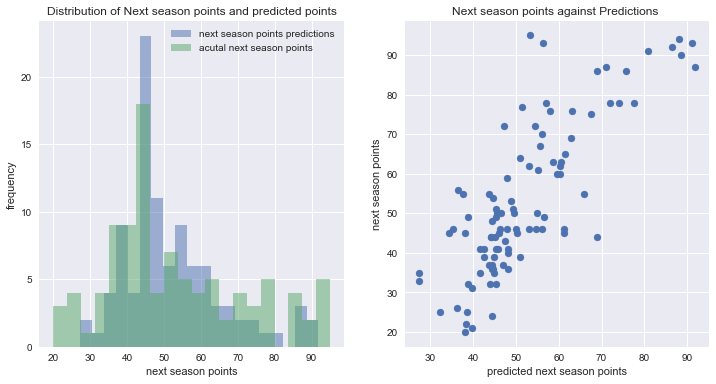

In [501]:
fig = plt.figure(figsize = (12, 6))
fig.add_subplot(1, 2, 1)
p1=plt.hist(mdl_test['preds'], alpha=0.5, bins=20, label = 'next season points predictions')
p2=plt.hist(mdl_test['ns_points'], alpha=0.5, bins=20, label = 'acutal next season points')
plt.legend()
plt.title('Distribution of Next season points and predicted points')
plt.xlabel('next season points')
plt.ylabel('frequency')
fig.add_subplot(1, 2, 2)
plt.scatter(mdl_test['preds'], mdl_test['ns_points'])
plt.title('Next season points against Predictions ')
plt.xlabel('predicted next season points')
plt.ylabel('next season points');

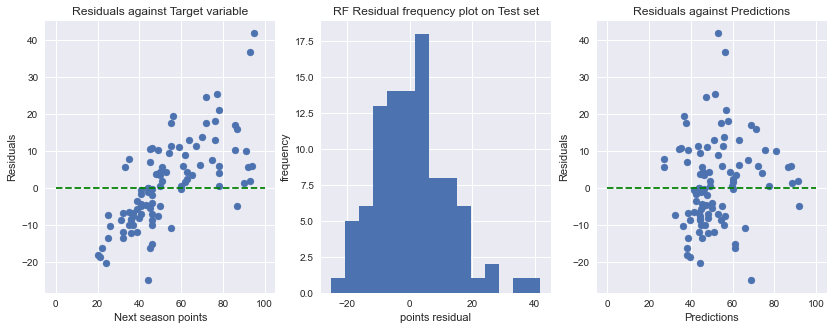

In [502]:
fig = plt.figure(figsize = (14, 5))
fig.add_subplot(1, 3, 1)
plt.scatter(mdl_test['ns_points'], mdl_test['resids'])
plt.hlines(0, 0, 100, colors = 'g', linestyles = 'dashed')
plt.title('Residuals against Target variable')
plt.xlabel('Next season points')
plt.ylabel('Residuals')
fig.add_subplot(1, 3, 2)
plt.hist(mdl_test['resids'], bins = 15);
plt.title('RF Residual frequency plot on Test set')
plt.xlabel('points residual')
plt.ylabel('frequency')
fig.add_subplot(1, 3, 3)
plt.scatter(mdl_test['preds'], mdl_test['resids'])
plt.hlines(0, 0, 100, colors = 'g', linestyles = 'dashed')
plt.title('Residuals against Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals');

The variance in prediction quality is greater than what would ideally be preferred. As can be seen on the right handside, there are some rogue predictions as well that predict almost 40 points lower than what the team actually accrued.

There does also appear to be a slightly positive relationship with the residuals and the target variable, meaning that the greater the following season points totals, the greater the residuals is likely to be. This means that the linear regression model selected is likely to underpredict high points tallies, and over-predict low ones, and the results are now dubious. This could be down to many extraneous factors in football producing surprising results, especially in the case of the outlier that can be seen in the left-hand plot of the residuals against the target variable.

In [504]:
display(mdl_test.loc[mdl_test['resids'] > 30])
display(mdl_test.loc[mdl_test['resids'] < -20])

,index,club,league,start_year,wins,losses,points_per_game,goals_scored,goals_conceded,goal_difference,clean_sheets,fts_count,average_possession,shots,shots_on_target,corners_total,losing_at_half_time_home,points,balance,ns_points,preds,resids
403,549,Chelsea,EPL,2015,12,12,1.32,4.077537,53,6,9,8,55.0,5.953243,5.192957,240.0,2,50,-8.11,93.0,56.353251,36.646749
435,581,Monaco,Ligue 1,2015,17,7,1.71,4.043051,50,7,14,5,50.0,5.897154,5.247024,204.0,4,65,66.90,95.0,53.166566,41.833434


,index,club,league,start_year,wins,losses,points_per_game,goals_scored,goals_conceded,goal_difference,clean_sheets,fts_count,average_possession,shots,shots_on_target,corners_total,losing_at_half_time_home,points,balance,ns_points,preds,resids
394,540,Leicester City,EPL,2015,23,3,2.13,4.219508,36,32,15,3,46.0,5.948035,5.147494,197.0,2,81,-36.41,44.0,69.002135,-25.002135
410,556,Sunderland,EPL,2015,9,17,1.03,3.871201,62,-14,7,12,45.0,5.720312,4.983607,153.0,5,39,-49.55,24.0,44.285414,-20.285414


Once examined, it can be seen how the model would predict such a low points tally following on from the seasons Chelsea and Monaco had. It was unable to tell what a high profile clubs they are and their usual performance. Although it was a conscious choice to use just current season points instead of a rolling average of points tallies in previous seasons, given the ebb and flow of team's quality which can and have changed a lot over the time period input in to the model, this feature would have most likely prevented this kind of residual slipping through. Future work should look to compare the use of a rolling average with this season-by-season points total approach. 

For the purposes of creating a league ranking from the test set, the individual seasons in the test set can be separated in to smaller sets, and each row can be tagged with an identifier before being ran through the model, so that once predictions are made, they can be coupled back up with their uniqe indeitifier, and ordered, producing a league table to compare with the one that actually transpired in real life. The only problem with this approach is that even if every team in the given season does have a next season points tally, that tally might not be actually from the following season: there are always 3 teams who are relegated to the lower division at the end of each season, so it will be impossible to create a full league table based on next season points. to remedy this, the simple approach of identifying the teams that are promoted the following season from the lower division, and ranking them in 18th, 19th, and 20th place depending on whether they came in 1st, 2nd, or 3rd (play-off winners) in that prior season. This is a flaw in the methods employed, and future research would look to create more competent ways of creating a full league ranking, by quantifying the achievements of the newly-promoted teams in the lower division from which they came, and weighting them lighter in relation to the achievements of the teams in the higher division, in order to give a more elegant model which was capable of generating actual predicting power for the newly promoted teams that could see them ranked above higher division teams, as they often do end up in real life.

## <font color='blue'>8. League table prediction </font>

In [505]:
pd.options.display.max_rows = 100
mdl_test.sort_values(by=['start_year', 'league', 'points'], ascending = [True, True, False], inplace =True)

<ipython-input-505-891d4ca8b159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdl_test.sort_values(by=['start_year', 'league', 'points'], ascending = [True, True, False], inplace =True)


,index,club,league,start_year,wins,losses,points_per_game,goals_scored,goals_conceded,goal_difference,clean_sheets,fts_count,average_possession,shots,shots_on_target,corners_total,losing_at_half_time_home,points,balance,ns_points,preds,resids
266,400,Atlético Madrid,La Liga,2013,28,4,2.37,4.343805,26,51,20,5,42.714286,6.045005,5.303305,258.0,0,90,30.69,78.0,77.541911,0.458089
267,401,Barcelona,La Liga,2013,27,5,2.29,4.605170,33,67,16,6,47.833333,6.204558,5.568345,268.0,0,87,-65.79,94.0,87.974063,6.025937
268,402,Real Madrid,La Liga,2013,27,5,2.29,4.644391,38,66,16,2,56.000000,6.411818,5.693732,256.0,2,87,-55.80,92.0,86.393881,5.606119
269,403,Athletic Bilbao,La Liga,2013,20,8,1.84,4.189655,39,27,12,6,46.500000,6.059123,5.267858,220.0,5,70,-13.86,55.0,65.855011,-10.855011
270,404,Sevilla,La Liga,2013,18,11,1.66,4.234107,52,17,9,6,48.000000,6.082219,5.225747,216.0,1,63,48.49,76.0,57.978069,18.021931


In [50]:
# isolating the league in question

laliga_2013 = mdl_test.loc[mdl_test.start_year == 2013]

In [51]:
# creating a data frame, one column each for the predicted points and the actual points

d = {'predicted points': list(laliga_2013['preds']), 'actual points': list(laliga_2013['ns_points'])}
laliga_2014_points = pd.DataFrame(data = d, index = laliga_2013['club'])

In [52]:
laliga_2014_points.sort_values(by = 'actual points', inplace = True, ascending = False)
laliga_2014_points

,predicted points,actual points
club,,
Barcelona,87.974063,94.0
Real Madrid,86.393881,92.0
Atlético Madrid,77.541911,78.0
Valencia,51.496825,77.0
Sevilla,57.978069,76.0
Villarreal,59.547885,60.0
Athletic Bilbao,65.855011,55.0
Celta de Vigo,49.233363,51.0
Málaga,46.551470,50.0


In terms of predicting points totals, the model can perform to an extremely satisfying extent. With league rankings however, it is important to note that this regression accuracy can be misrepresented as predictions are transposed to ordinal data. With rankings, the extent to which the model appears successful varies with how close each season was in terms of points, which - as can be seen below - can vary.

In [53]:
# selecting the teams that were not relegated
predictedrank = laliga_2013.sort_values(by = 'points', ascending = False)
predictedrank = predictedrank.iloc[0:17, :]
# ranking the 17 teams by their predicted following season points
predictedrank.sort_values(by = 'preds', ascending = False, inplace = True)
predictedrank = list(predictedrank['club'])

In [54]:
# incorporating the newly promoted teams to the predicted table

promotedteams = ['Eibar', 'Deportivo', 'Córdoba']
predictedrank.append(promotedteams[0])
predictedrank.append(promotedteams[1])
predictedrank.append(promotedteams[2])
predictedrank

['Barcelona',
 'Real Madrid',
 'Atlético Madrid',
 'Athletic Bilbao',
 'Villarreal',
 'Sevilla',
 'Real Sociedad',
 'Valencia',
 'Celta de Vigo',
 'Málaga',
 'Espanyol',
 'Levante UD',
 'Getafe',
 'Elche',
 'Granada',
 'Almería',
 'Rayo Vallecano',
 'Eibar',
 'Deportivo',
 'Córdoba']

In [55]:
# creating the real league table

actualrank = ['Barcelona','Real Madrid', 'Atlético Madrid', 'Valencia','Sevilla','Villarreal','Athletic Bilbao',\
             'Celta de Vigo','Málaga','Espanyol','Rayo Vallecano','Real Sociedad','Elche','Levante UD','Getafe',\
             'Deportivo','Granada','Eibar','Almería','Córdoba']

In [56]:
# creating a data frame, one column for the predicted rankings, and one for the real rankings

d = {'predicted rank': predictedrank, 'actual rank': actualrank}
laliga_2014_rankings = pd.DataFrame(data = d)
laliga_2014_rankings.index +=1

In [57]:
laliga_2014_rankings

,predicted rank,actual rank
1,Barcelona,Barcelona
2,Real Madrid,Real Madrid
3,Atlético Madrid,Atlético Madrid
4,Athletic Bilbao,Valencia
5,Villarreal,Sevilla
6,Sevilla,Villarreal
7,Real Sociedad,Athletic Bilbao
8,Valencia,Celta de Vigo
9,Celta de Vigo,Málaga
10,Málaga,Espanyol


In [58]:
# repeating the process for the other league seasons

test2015 = mdl_test.loc[mdl_test['start_year'] == 2015]
epl2015 = test2015.loc[test2015['league'] == 'EPL']

In [59]:
# selecting the teams that were not relegated
predictedrank = epl2015.sort_values(by = 'points', ascending = False)
predictedrank = predictedrank.iloc[0:17, :]
# ranking the 17 teams by their predicted following season points
predictedrank.sort_values(by = 'preds', ascending = False, inplace = True)
predictedrank = list(predictedrank['club'])
predictedrank

['Manchester City',
 'Leicester City',
 'Tottenham Hotspur',
 'Arsenal',
 'Liverpool',
 'Manchester United',
 'Southampton',
 'West Ham United',
 'Chelsea',
 'Everton',
 'Crystal Palace',
 'Watford',
 'A Bournemouth',
 'West Bromwich Albion',
 'Swansea City',
 'Stoke City',
 'Sunderland']

In [60]:
promotedteams = ['Burnley', 'Middlesbrough', 'Hull City']
predictedrank.append(promotedteams[0])
predictedrank.append(promotedteams[1])
predictedrank.append(promotedteams[2])
predictedrank

['Manchester City',
 'Leicester City',
 'Tottenham Hotspur',
 'Arsenal',
 'Liverpool',
 'Manchester United',
 'Southampton',
 'West Ham United',
 'Chelsea',
 'Everton',
 'Crystal Palace',
 'Watford',
 'A Bournemouth',
 'West Bromwich Albion',
 'Swansea City',
 'Stoke City',
 'Sunderland',
 'Burnley',
 'Middlesbrough',
 'Hull City']

In [61]:
actualrank = ['Chelsea', 'Tottenham Hotspur', 'Manchester City','Liverpool','Arsenal','Manchester United','Everton',\
             'Southampton','Bournemouth','West Bromwich Albion','West Ham United','Leicester City','Stoke City',\
             'Crystal Palace', 'Swansea City', 'Burnley', 'Watford', 'Hull City', 'Middlesbrough', 'Sunderland']

In [62]:
d = {'predicted rank': predictedrank, 'actual rank': actualrank}
epl_2016_rankings = pd.DataFrame(data = d)
epl_2016_rankings.index +=1
epl_2016_rankings

,predicted rank,actual rank
1,Manchester City,Chelsea
2,Leicester City,Tottenham Hotspur
3,Tottenham Hotspur,Manchester City
4,Arsenal,Liverpool
5,Liverpool,Arsenal
6,Manchester United,Manchester United
7,Southampton,Everton
8,West Ham United,Southampton
9,Chelsea,Bournemouth
10,Everton,West Bromwich Albion


In [63]:
serieA2015 = test2015.loc[test2015['league'] == 'Serie A']

# selecting the teams that were not relegated
predictedrank = serieA2015.sort_values(by = 'points', ascending = False)
predictedrank = predictedrank.iloc[0:17, :]
# ranking the 17 teams by their predicted following season points
predictedrank.sort_values(by = 'preds', ascending = False, inplace = True)
predictedrank = list(predictedrank['club'])

In [64]:
promotedteams = ['Cagliari', 'Crotone', 'Pescara']
predictedrank.append(promotedteams[0])
predictedrank.append(promotedteams[1])
predictedrank.append(promotedteams[2])
predictedrank

['Juventus',
 'Napoli',
 'Roma',
 'AC Milan',
 'Inter Milan',
 'Fiorentina',
 'Sassuolo',
 'Lazio',
 'Torino',
 'Genoa',
 'Chievo',
 'Atalanta',
 'Bologna',
 'Empoli',
 'Sampdoria',
 'Udinese',
 'Palermo',
 'Cagliari',
 'Crotone',
 'Pescara']

In [65]:
actualrank = ['Juventus', 'Roma', 'Napoli', 'Atalanta', 'Lazio', 'AC Milan', 'Inter Milan', 'Fiorentina', 'Torino',\
             'Sassuolo', 'Sampdoria', 'Cagliari', 'Udinese', 'Chievo', 'Bologna', 'Genoa', 'Crotone', 'Empoli',\
             'Palermo', 'Pescara']

In [66]:
d = {'predicted rank': predictedrank, 'actual rank': actualrank}
serieA_2016_rankings = pd.DataFrame(data = d)
serieA_2016_rankings.index +=1
serieA_2016_rankings

,predicted rank,actual rank
1,Juventus,Juventus
2,Napoli,Roma
3,Roma,Napoli
4,AC Milan,Atalanta
5,Inter Milan,Lazio
6,Fiorentina,AC Milan
7,Sassuolo,Inter Milan
8,Lazio,Fiorentina
9,Torino,Torino
10,Genoa,Sassuolo


In [67]:
ligue12015 = test2015.loc[test2015['league'] == 'Ligue 1']

# selecting the teams that were not relegated
predictedrank = ligue12015.sort_values(by = 'points', ascending = False)
predictedrank = predictedrank.iloc[0:17, :]
# ranking the 17 teams by their predicted following season points
predictedrank.sort_values(by = 'preds', ascending = False, inplace = True)
predictedrank = list(predictedrank['club'])

promotedteams = ['Nancy', 'Dijon', 'Metz']
predictedrank.append(promotedteams[0])
predictedrank.append(promotedteams[1])
predictedrank.append(promotedteams[2])
predictedrank

['Paris Saint-Germain',
 'Olympique Lyon',
 'Nice',
 'Lille',
 'Saint-Étienne',
 'Monaco',
 'Olympique Marseille',
 'Montpellier',
 'Rennes',
 'Bordeaux',
 'Angers SCO',
 'Caen',
 'Guingamp',
 'Nantes',
 'Bastia',
 'Lorient',
 'Toulouse',
 'Nancy',
 'Dijon',
 'Metz']

In [68]:
actualrank = ['Monaco', 'Paris Saint-Germain', 'Nice', 'Olympique Lyon', 'Marseille', 'Bordeaux', 'Nantes', 'Rennes',\
            'Saint-Étienne', 'Guingamp', 'Angers SCO', 'Lille', 'Toulouse', 'Metz', 'Montpellier', 'Dijon', 'Caen',\
            'Lorient', 'Nancy', 'Bastia']

In [69]:
d = {'predicted rank': predictedrank, 'actual rank': actualrank}
ligue1_2016_rankings = pd.DataFrame(data = d)
ligue1_2016_rankings.index +=1
ligue1_2016_rankings

,predicted rank,actual rank
1,Paris Saint-Germain,Monaco
2,Olympique Lyon,Paris Saint-Germain
3,Nice,Nice
4,Lille,Olympique Lyon
5,Saint-Étienne,Marseille
6,Monaco,Bordeaux
7,Olympique Marseille,Nantes
8,Montpellier,Rennes
9,Rennes,Saint-Étienne
10,Bordeaux,Guingamp


In [70]:
laliga2015 = test2015.loc[test2015['league'] == 'La Liga']

# selecting the teams that were not relegated
predictedrank = laliga2015.sort_values(by = 'points', ascending = False)
predictedrank = predictedrank.iloc[0:17, :]
# ranking the 17 teams by their predicted following season points
predictedrank.sort_values(by = 'preds', ascending = False, inplace = True)
predictedrank = list(predictedrank['club'])

promotedteams = ['Alavés' , 'Leganés', 'Osasuna']
predictedrank.append(promotedteams[0])
predictedrank.append(promotedteams[1])
predictedrank.append(promotedteams[2])
predictedrank

['Real Madrid',
 'Barcelona',
 'Atlético Madrid',
 'Athletic Bilbao',
 'Villarreal',
 'Sevilla',
 'Valencia',
 'Real Sociedad',
 'Celta de Vigo',
 'Málaga',
 'Las Palmas',
 'SD Eibar',
 'Deportivo La Coruña',
 'Real Betis',
 'Sporting Gijón',
 'Granada',
 'Espanyol',
 'Alavés',
 'Leganés',
 'Osasuna']

In [71]:
actualrank = ['Real Madrid', 'Barcelona', 'Atlético Madrid', 'Sevilla', 'Villarreal', 'Real Sociedad', 'Athletic Bilbao',\
             'Espanyol', 'Alavés', 'SD Eibar','Málaga', 'Valencia', 'Celta de Vigo', 'Las Palmas', 'Real Betis', 'Deportivo La Coruña',\
             'Leganés', 'Sporting Gijón', 'Osasuna', 'Granada']

In [72]:
d = {'predicted rank': predictedrank, 'actual rank': actualrank}
laliga_2016_rankings = pd.DataFrame(data = d)
laliga_2016_rankings.index +=1
laliga_2016_rankings

,predicted rank,actual rank
1,Real Madrid,Real Madrid
2,Barcelona,Barcelona
3,Atlético Madrid,Atlético Madrid
4,Athletic Bilbao,Sevilla
5,Villarreal,Villarreal
6,Sevilla,Real Sociedad
7,Valencia,Athletic Bilbao
8,Real Sociedad,Espanyol
9,Celta de Vigo,Alavés
10,Málaga,SD Eibar


#### 8.2 Quantifying predictive ability of model

These league rankings certainly could not be called majorly accurate, however in the context of club football, they do represent a plausible table, which is a result. This last part is a not-particularly-empirical quantification of the ranking results, in which a classification accuracy is calculated, with a true positive being counted when a team is ranked in the correct position, and half a true positive is counted if a team is ranked just 1 place away from the correct position. the best percentage was 32.5%, while the average was 0.215. Also calculated were typical popular bets such as what team is crowned champions, what teams make it in to the top 4 and therefore get in to the european competitions, and what teams are relegated to the lower division. The code is below, and the results are as following:

> 1. Average ranking accuracy: 0.215
> 2. Champions classification accuracy: 0.666
> 3. Top 4 accuracy: 0.7
> 4. Relegated accuracy: 0.4


In [73]:
# for each league and season in the test set, classification accuracy measures are calculated and summed for
# predicting champions, top 4, bottom 3, and overall ranking.

championsl = []
top4l = []
bottom3l = []
avg_pct = []
correct = 0
for index, row in laliga_2014_rankings.iterrows():
    if index == 1:
        below = laliga_2014_rankings.iloc[1, 1]
        if row['predicted rank'] == row['actual rank']:
            correct += 1
        elif row['predicted rank'] == below:
            correct += 0.25
    elif index == 20:
        above = laliga_2014_rankings.iloc[18, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
    else:
        aboveidx = index-2
        belowidx = index
        above = laliga_2014_rankings.iloc[aboveidx, 1]
        below = laliga_2014_rankings.iloc[belowidx, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
        elif row['predicted rank'] == below:
            correct += 0.25

correct_pct = correct/20
print(correct_pct)
avg_pct.append(correct_pct)

0.325


In [82]:
champions = laliga_2014_rankings.iloc[0, :]
top4 = laliga_2014_rankings.iloc[0:4, :]
bottom3 = laliga_2014_rankings.iloc[16:19, :]

if champions['predicted rank'] == champions['actual rank']:
    championsl.append(1)
else:
    championsl.append(0)

predictedtop4 = list(top4['predicted rank'])
actualtop4 = list(top4['actual rank'])
for each in predictedtop4:
    if each in actualtop4:
        top4l.append(1)
    else:
        top4l.append(0)
predictedbottom3 = list(bottom3['predicted rank'])
actualbottom3 = list(bottom3['actual rank'])
for each in predictedbottom3:
    if each in actualbottom3:
        bottom3l.append(1)
    else: 
        bottom3l.append(0)

In [615]:
correct = 0
for index, row in epl_2016_rankings.iterrows():
    if index == 1:
        below = epl_2016_rankings.iloc[1, 1]
        if row['predicted rank'] == row['actual rank']:
            correct += 1
        elif row['predicted rank'] == below:
            correct += 0.25
    elif index == 20:
        above = epl_2016_rankings.iloc[18, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
    else:
        aboveidx = index-2
        belowidx = index
        above = epl_2016_rankings.iloc[aboveidx, 1]
        below = epl_2016_rankings.iloc[belowidx, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
        elif row['predicted rank'] == below:
            correct += 0.25

correct_pct = correct/20 
print(correct_pct)
avg_pct.append(correct_pct)

0.2


In [83]:
champions = epl_2016_rankings.iloc[0, :]
top4 = epl_2016_rankings.iloc[0:4, :]
bottom3 = epl_2016_rankings.iloc[16:19, :]

if champions['predicted rank'] == champions['actual rank']:
    championsl.append(1)
else:
    championsl.append(0)

predictedtop4 = list(top4['predicted rank'])
actualtop4 = list(top4['actual rank'])
for each in predictedtop4:
    if each in actualtop4:
        top4l.append(1)
    else:
        top4l.append(0)
predictedbottom3 = list(bottom3['predicted rank'])
actualbottom3 = list(bottom3['actual rank'])
for each in predictedbottom3:
    if each in actualbottom3:
        bottom3l.append(1)
    else: 
        bottom3l.append(0)

In [616]:
correct = 0
for index, row in serieA_2016_rankings.iterrows():
    if index == 1:
        below = serieA_2016_rankings.iloc[1, 1]
        if row['predicted rank'] == row['actual rank']:
            correct += 1
        elif row['predicted rank'] == below:
            correct += 0.25
    elif index == 20:
        above = serieA_2016_rankings.iloc[18, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
    else:
        aboveidx = index-2
        belowidx = index
        above = serieA_2016_rankings.iloc[aboveidx, 1]
        below = serieA_2016_rankings.iloc[belowidx, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
        elif row['predicted rank'] == below:
            correct += 0.25

correct_pct = correct/20 
print(correct_pct)
avg_pct.append(correct_pct)

0.175


In [84]:
champions = serieA_2016_rankings.iloc[0, :]
top4 = serieA_2016_rankings.iloc[0:4, :]
bottom3 = serieA_2016_rankings.iloc[16:19, :]

if champions['predicted rank'] == champions['actual rank']:
    championsl.append(1)
else:
    championsl.append(0)

predictedtop4 = list(top4['predicted rank'])
actualtop4 = list(top4['actual rank'])
for each in predictedtop4:
    if each in actualtop4:
        top4l.append(1)
    else:
        top4l.append(0)
predictedbottom3 = list(bottom3['predicted rank'])
actualbottom3 = list(bottom3['actual rank'])
for each in predictedbottom3:
    if each in actualbottom3:
        bottom3l.append(1)
    else: 
        bottom3l.append(0)

In [617]:
correct = 0
for index, row in ligue1_2016_rankings.iterrows():
    if index == 1:
        below = ligue1_2016_rankings.iloc[1, 1]
        if row['predicted rank'] == row['actual rank']:
            correct += 1
        elif row['predicted rank'] == below:
            correct += 0.25
    elif index == 20:
        above = ligue1_2016_rankings.iloc[18, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
    else:
        aboveidx = index-2
        belowidx = index
        above = ligue1_2016_rankings.iloc[aboveidx, 1]
        below = ligue1_2016_rankings.iloc[belowidx, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
        elif row['predicted rank'] == below:
            correct += 0.25

correct_pct = correct/20 
print(correct_pct)
avg_pct.append(correct_pct)

0.1375


In [85]:
champions = ligue1_2016_rankings.iloc[0, :]
top4 = ligue1_2016_rankings.iloc[0:4, :]
bottom3 = ligue1_2016_rankings.iloc[16:19, :]

if champions['predicted rank'] == champions['actual rank']:
    championsl.append(1)
else:
    championsl.append(0)

predictedtop4 = list(top4['predicted rank'])
actualtop4 = list(top4['actual rank'])
for each in predictedtop4:
    if each in actualtop4:
        top4l.append(1)
    else:
        top4l.append(0)
predictedbottom3 = list(bottom3['predicted rank'])
actualbottom3 = list(bottom3['actual rank'])
for each in predictedbottom3:
    if each in actualbottom3:
        bottom3l.append(1)
    else: 
        bottom3l.append(0)

In [618]:
correct = 0
championscorrect = 0
top4correct = 0
bottom3corect = 0
for index, row in laliga_2016_rankings.iterrows():
    if index == 1:
        below = laliga_2016_rankings.iloc[1, 1]
        if row['predicted rank'] == row['actual rank']:
            correct += 1
        elif row['predicted rank'] == below:
            correct += 0.25
    elif index == 20:
        above = laliga_2016_rankings.iloc[18, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
    else:
        aboveidx = index-2
        belowidx = index
        above = laliga_2016_rankings.iloc[aboveidx, 1]
        below = laliga_2016_rankings.iloc[belowidx, 1]
        if row['predicted rank'] == row['actual rank']:
            correct +=1
        elif row['predicted rank'] == above:
            correct += 0.25
        elif row['predicted rank'] == below:
            correct += 0.25

correct_pct = correct/20 
print(correct_pct)
avg_pct.append(correct_pct)

0.2375


In [86]:
champions = laliga_2016_rankings.iloc[0, :]
top4 = laliga_2016_rankings.iloc[0:4, :]
bottom3 = laliga_2016_rankings.iloc[16:19, :]

if champions['predicted rank'] == champions['actual rank']:
    championsl.append(1)
else:
    championsl.append(0)

predictedtop4 = list(top4['predicted rank'])
actualtop4 = list(top4['actual rank'])
for each in predictedtop4:
    if each in actualtop4:
        top4l.append(1)
    else:
        top4l.append(0)
predictedbottom3 = list(bottom3['predicted rank'])
actualbottom3 = list(bottom3['actual rank'])
for each in predictedbottom3:
    if each in actualbottom3:
        bottom3l.append(1)
    else: 
        bottom3l.append(0)

In [621]:
# calculating average classification accuracy

mean_accuracy = sum(avg_pct)/len(avg_pct)
print(mean_accuracy)

0.215


In [87]:
# calculating popular betting accuracies

champions_accuracy = sum(championsl)/len(championsl)
top4_accuracy = sum(top4l)/len(top4l)
bottom3_accuracy = sum(bottom3l)/len(bottom3l)

print(champions_accuracy)
print(top4_accuracy)
print(bottom3_accuracy)

0.6666666666666666
0.7
0.4
